Final Project Implementation

AI 539

Santhos Kamal Arumugam Balamurugan

03/18/2024

Reference: Chatgpt





In [1]:
#load libararies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline
import seaborn as sns


In [2]:
#load datasets
data = pd.read_csv('/content/covtype.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
#list of columns
print(data.columns)


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [4]:
#shape of data
data.shape

(581012, 55)

In [6]:
# Initialize an empty set to store unique values
unique_values = set()

# Iterate through each column in the dataset
for column in data.columns:
    # Extract unique values from the column and add them to the set
    unique_values.update(data[column].unique())

# Count the number of unique values (classes)
num_classes = len(unique_values)

print("Number of classes in the dataset:", num_classes)

Number of classes in the dataset: 6683


In [8]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
#About Target/Cover_Type variable
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

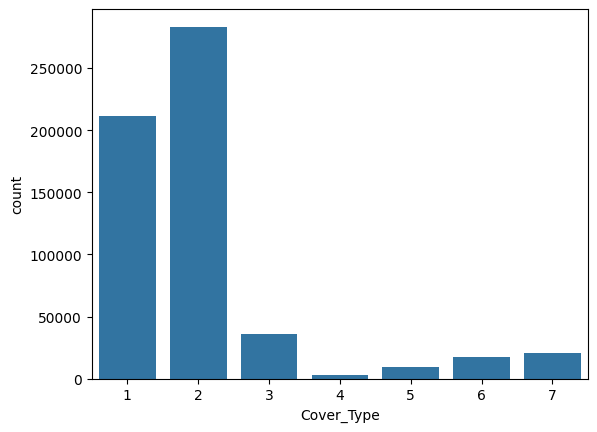

In [10]:
#count plot of target
sb.countplot(x='Cover_Type', data=data)
plt.show()

In [11]:
#Take some column
col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

In [12]:
train = data[col]

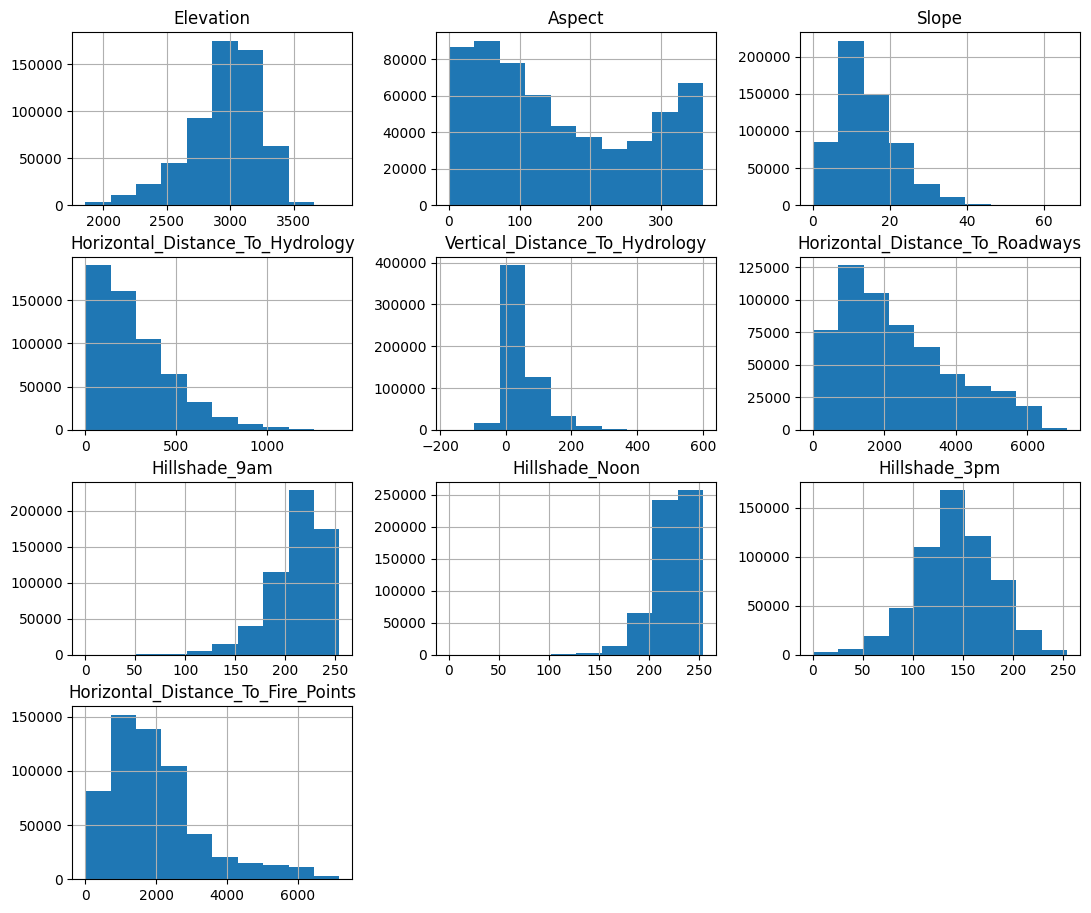

In [13]:
#histogram
train.hist(figsize=(13, 11))
plt.show()

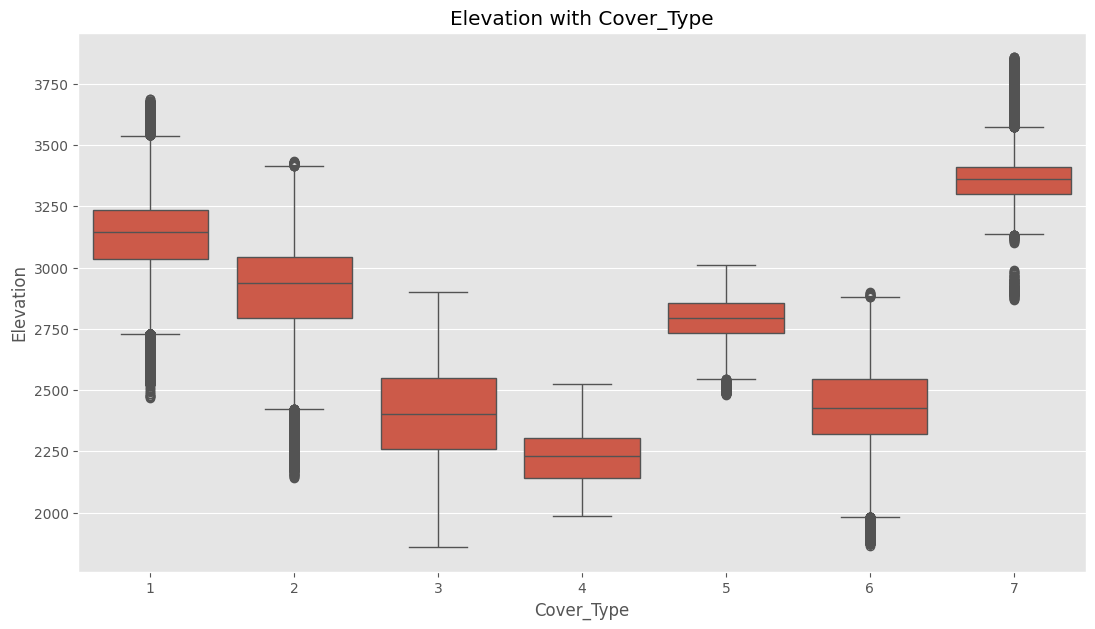

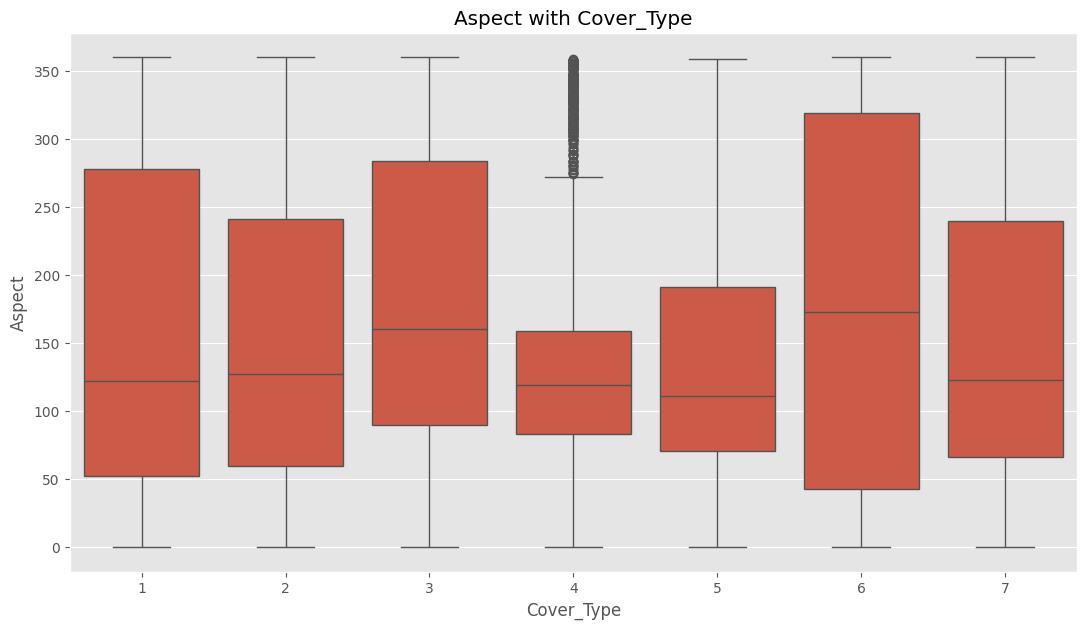

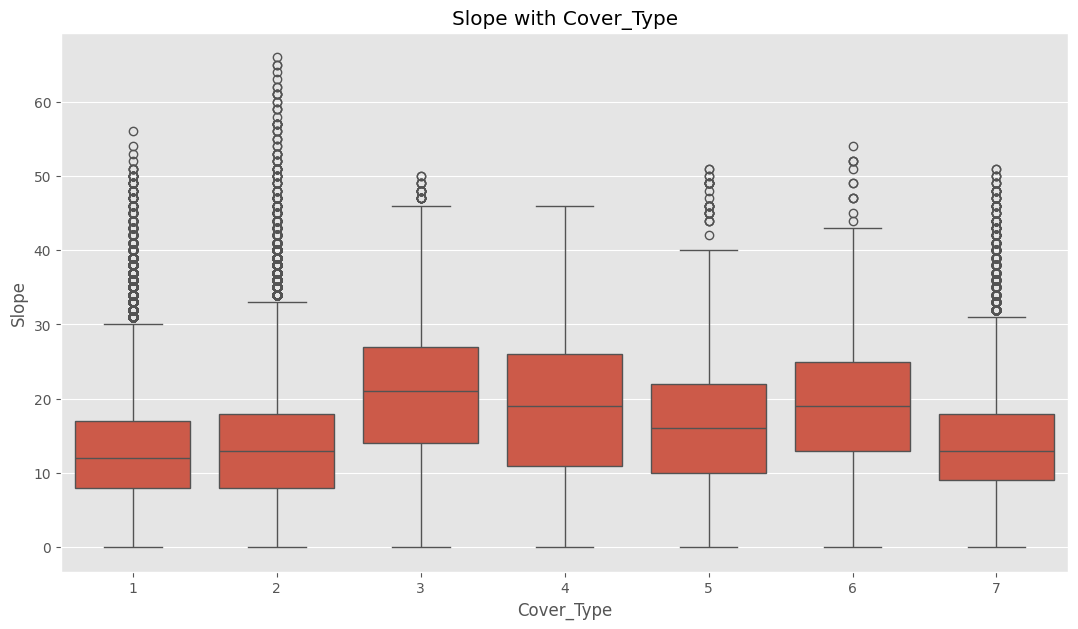

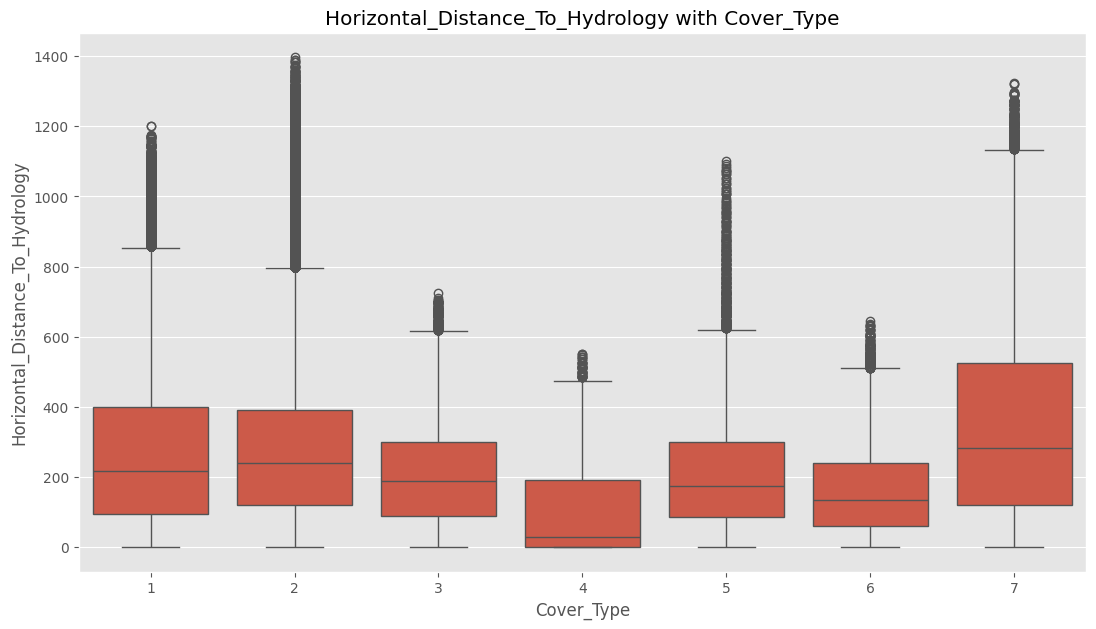

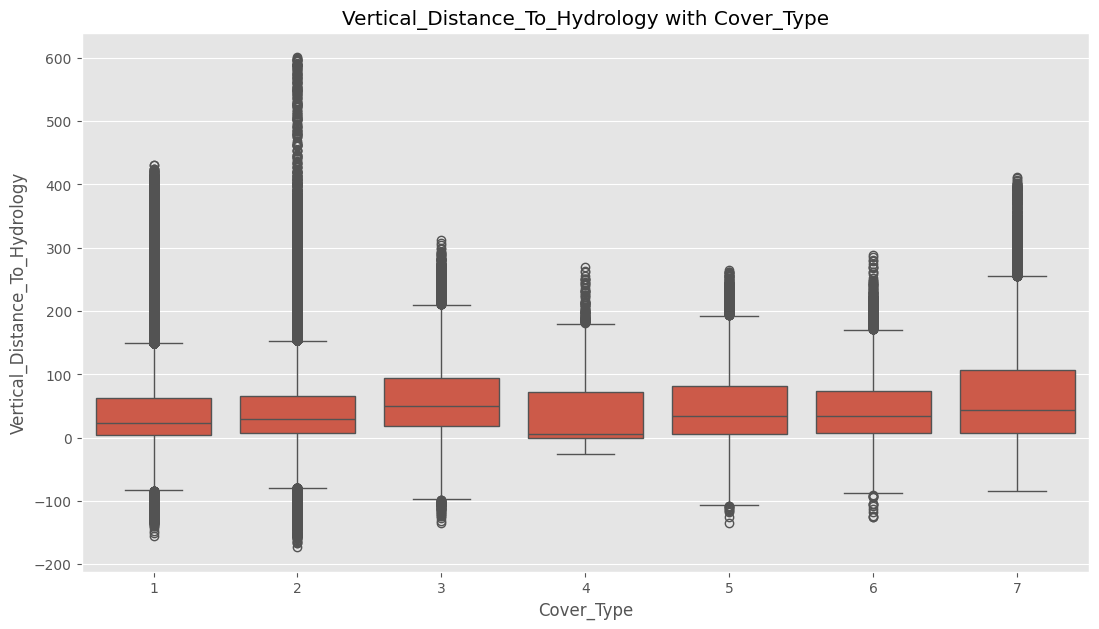

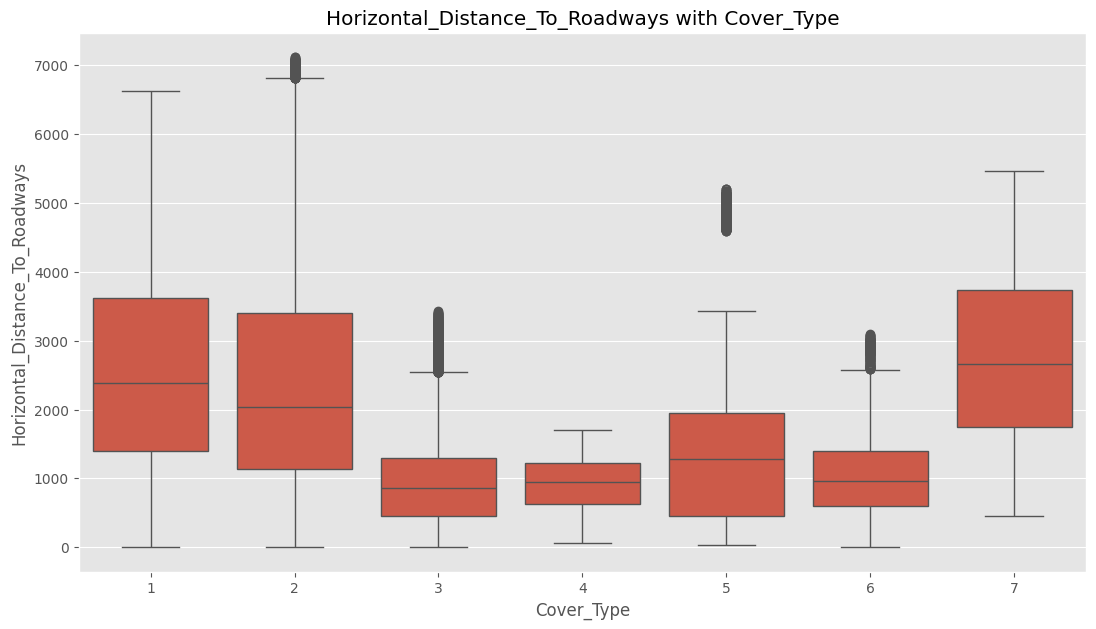

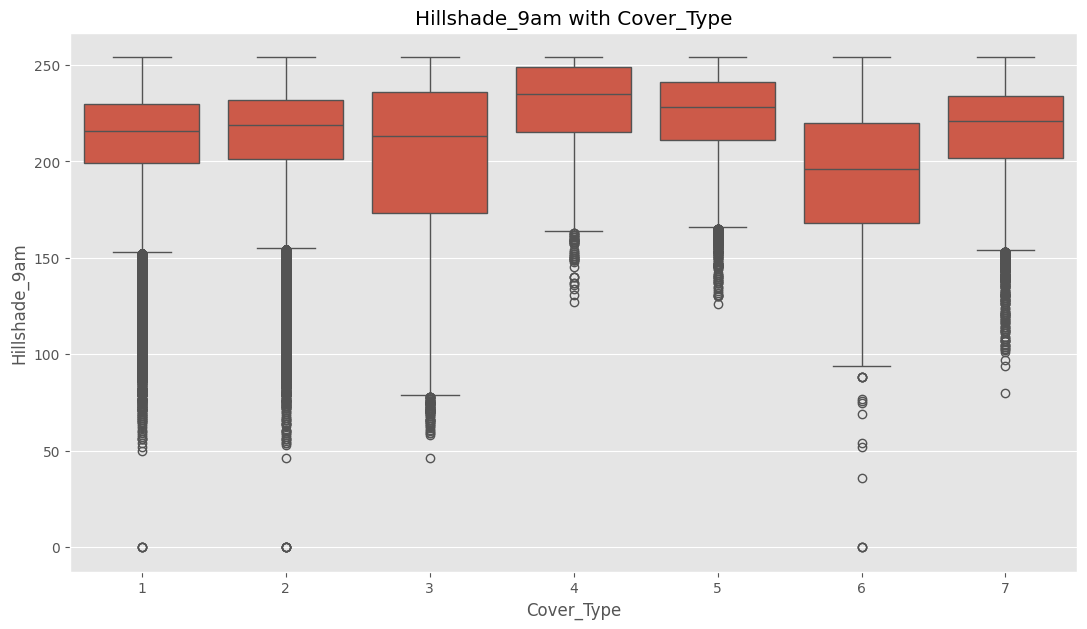

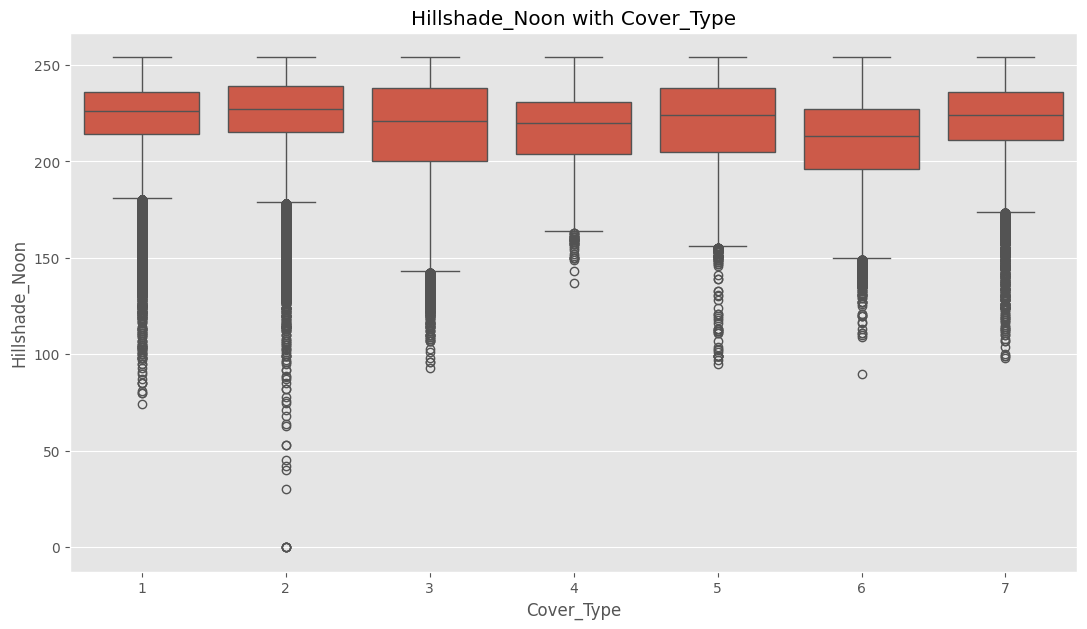

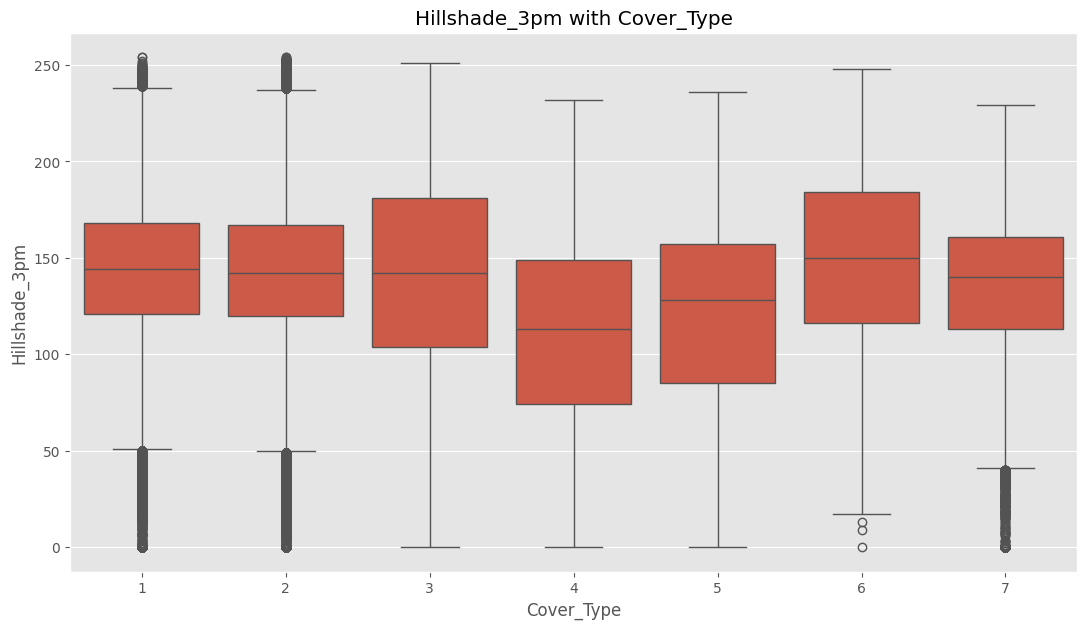

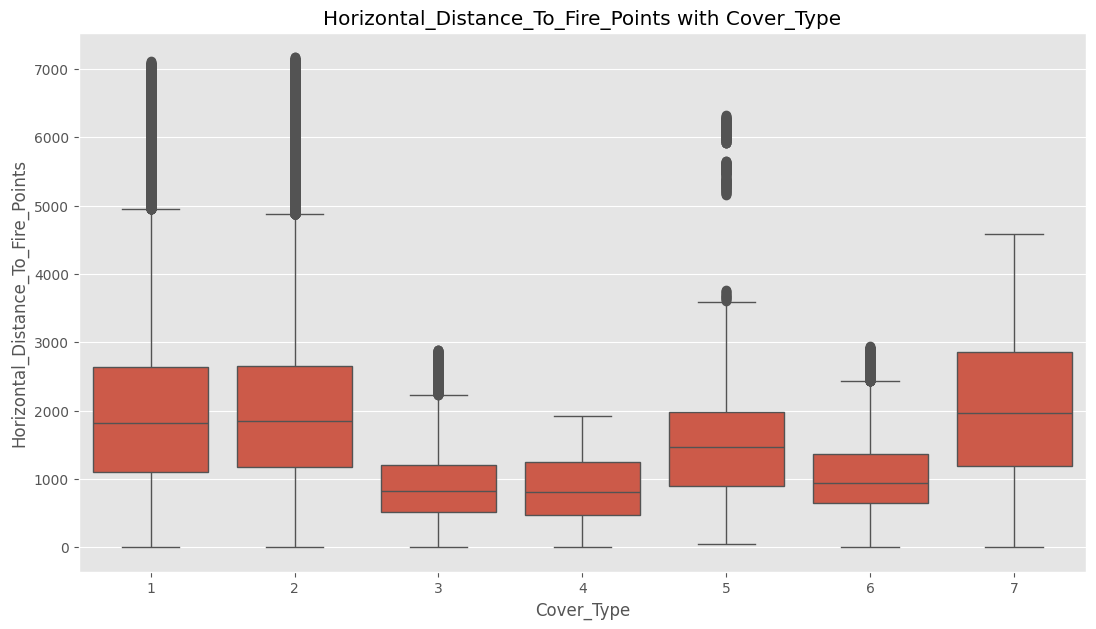

In [14]:
#Boxplot
plt.style.use('ggplot')
for i in col:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sb.boxplot(x=data.Cover_Type, y=train[i])
    plt.show()

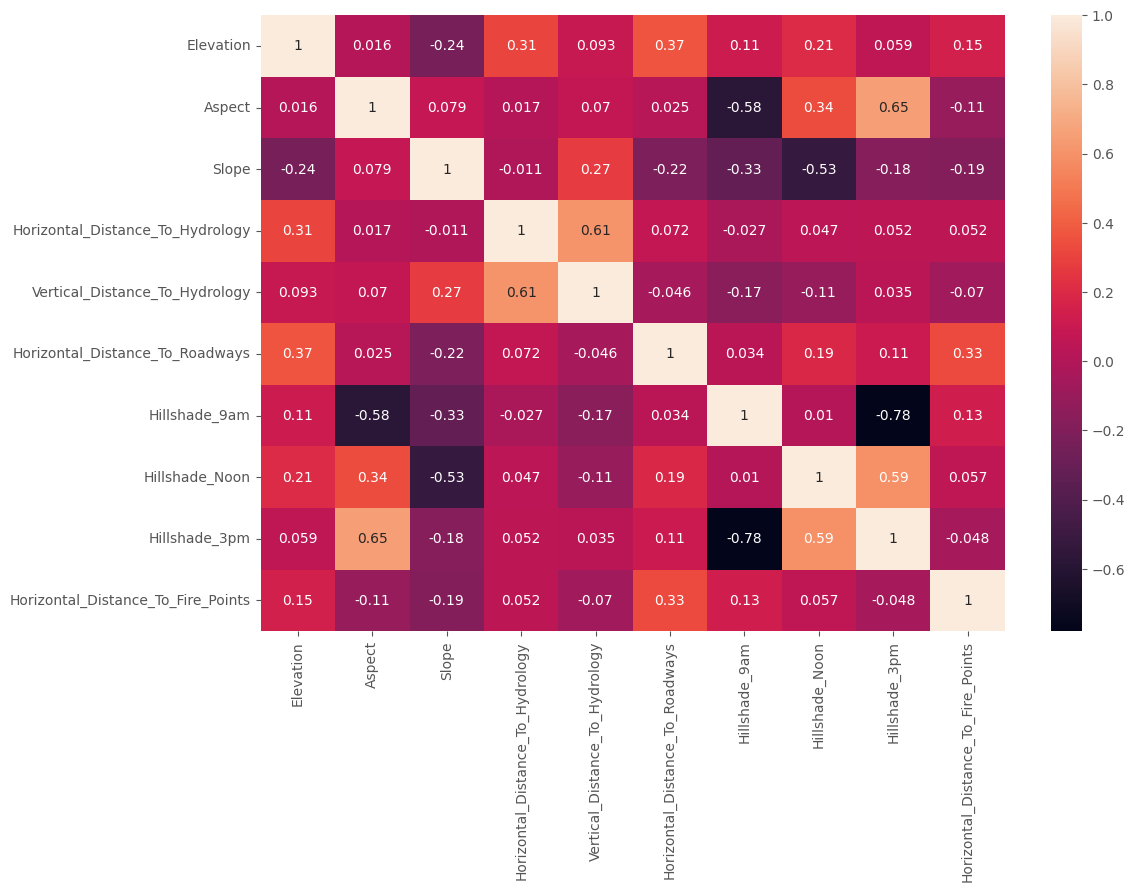

In [15]:
#Corralation
plt.figure(figsize=(12, 8))
corr = train.corr()
sb.heatmap(corr, annot=True)
plt.show()

**Random Forest Implementation and its accuracy**

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#separate features and target
feature = data.iloc[:, :54] #Features of data
y = data.iloc[:, 54]  #Target of data

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, y)

model = SelectFromModel(ETC, prefit=True)
X = model.transform(feature) #new features

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [17]:
#shape of new feature
X.shape

(581012, 12)

In [18]:
#Split the data into test and train formate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


Accuracy --  94.87170660846937


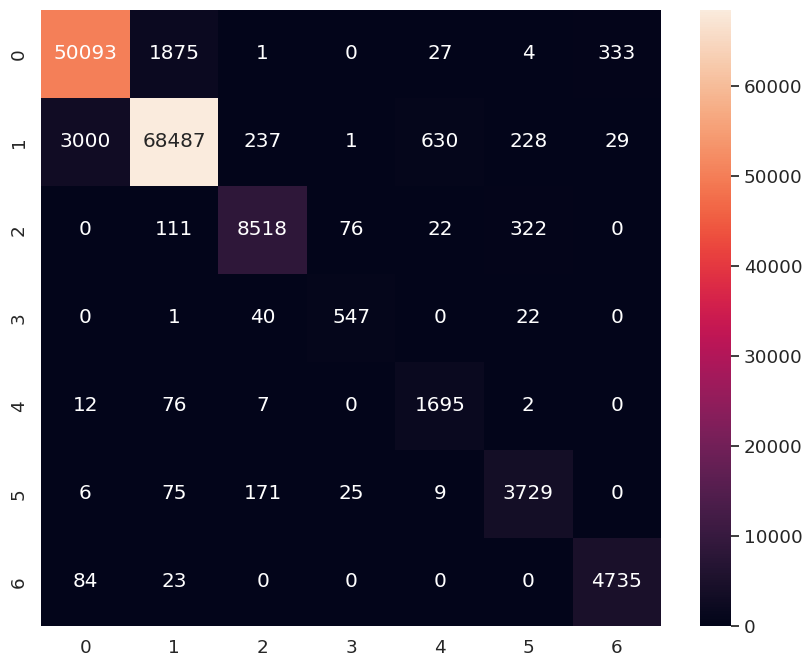

In [19]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared Error
r_squared = r2_score(y_test, y_pred)
print("R-squared Error:", r_squared)



Mean Squared Error: 0.26499280565633754
Mean Absolute Error: 0.09146110579471681
R-squared Error: 0.8636122903359514


Strategy 1: **Resampling Technique**

In [21]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Define resampling strategy
over_sampler = SMOTE(sampling_strategy=0.5)
under_sampler = RandomUnderSampler(sampling_strategy=0.8)

ros = RandomOverSampler()

# Define pipeline with resampling steps
pipeline = Pipeline([
    ('over', over_sampler),
    ('under', under_sampler)
])

# Apply resampling to training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Defining the classifier with adjusted class weights
RFC = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Train the classifier on the resampled training data
RFC.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced')

Accuracy --  94.77601151094987


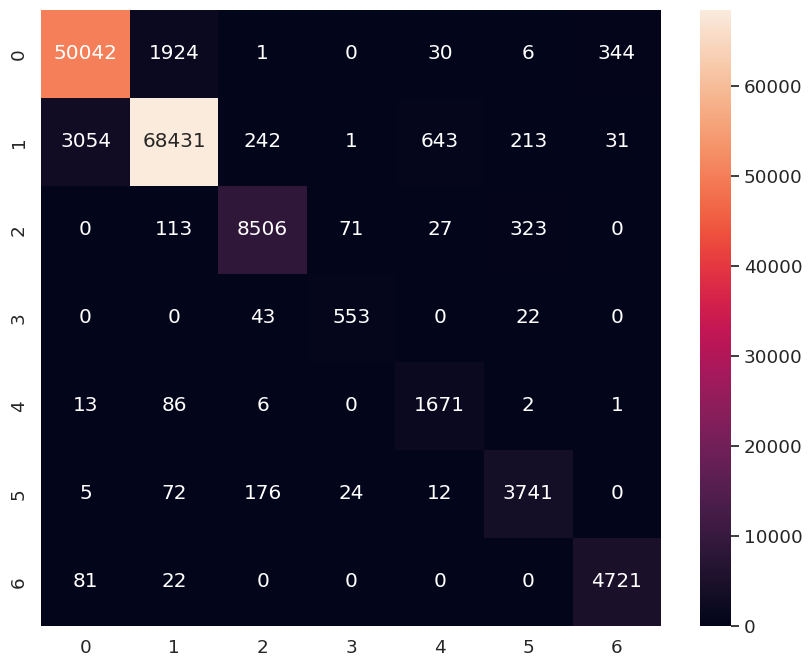

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

# Prediction Of RFC
y_pred = RFC.predict(X_test)

# Printing the accuracy Resampling Technique with RFC Test score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

# Imp confusion Matrix
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared Error
r_squared = r2_score(y_test, y_pred)
print("R-squared Error:", r_squared)


Mean Squared Error: 0.2684213062725038
Mean Absolute Error: 0.09287932090903459
R-squared Error: 0.8618476939520514


Strategy: 1 **Cost-Sensitive Learning**

Accuracy with class weights: 0.9493091364722244


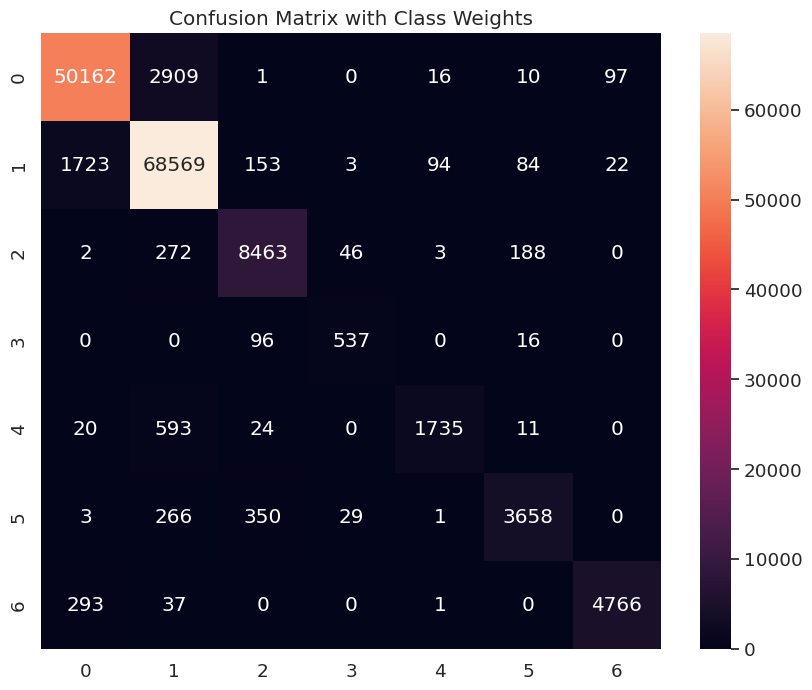

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

# Defining the class weights for multi-class classification
class_weights = 'balanced'

# Initialize RandomForestClassifier with class weights
RFC_weighted = RandomForestClassifier(n_estimators=100, class_weight=class_weights)

try:
    # Fit the model
    RFC_weighted.fit(X_train, y_train)

    # Make predictions
    y_pred_weighted = RFC_weighted.predict(X_test)

    # Evaluate the model
    accuracy_weighted = RFC_weighted.score(X_test, y_test)
    print("Accuracy with class weights:", accuracy_weighted)

    # Confusion matrix
    cm_weighted = confusion_matrix(y_test, y_pred_weighted)
    plt.figure(figsize=(10, 8))
    sb.set(font_scale=1.2)
    sb.heatmap(cm_weighted, annot=True, fmt='g')
    plt.title("Confusion Matrix with Class Weights")
    plt.show()

except ValueError as e:
    print("Error occurred during fitting the model:", e)


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared Error
r_squared = r2_score(y_test, y_pred)
print("R-squared Error:", r_squared)


Mean Squared Error: 0.26874487962382876
Mean Absolute Error: 0.09288620544842448
R-squared Error: 0.8616811557391131


Strategy:2 **Interquartile Range (IQR)**

<ipython-input-28-e70d0433e89c>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


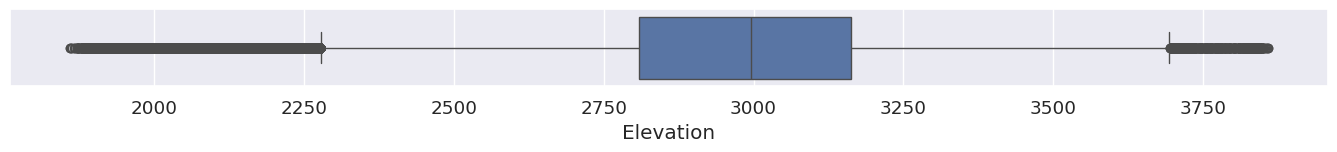

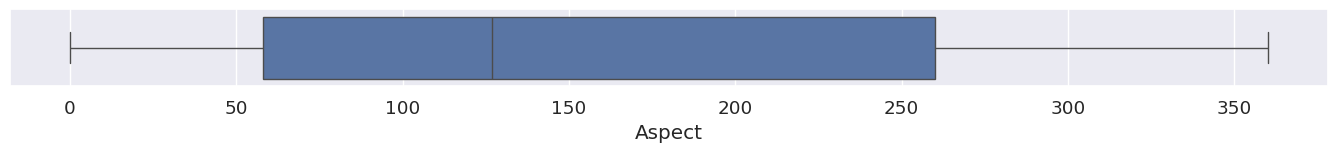

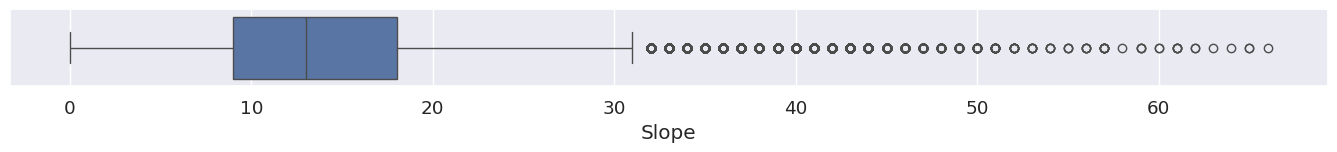

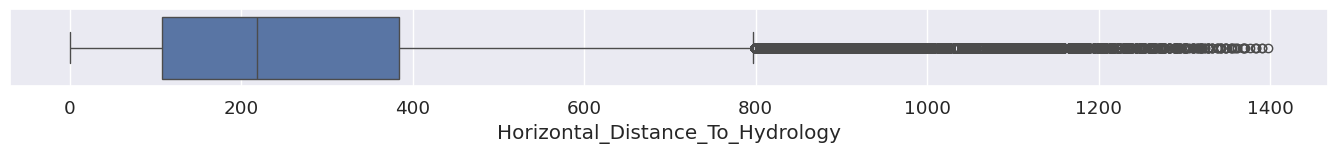

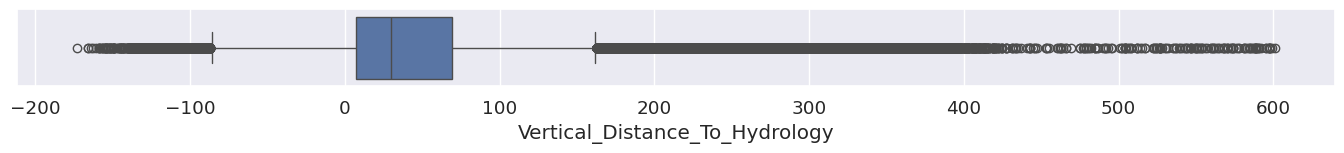

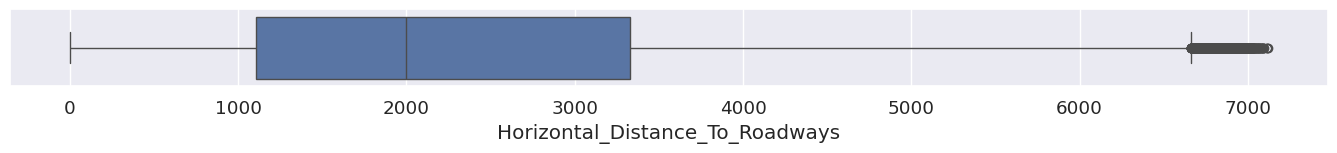

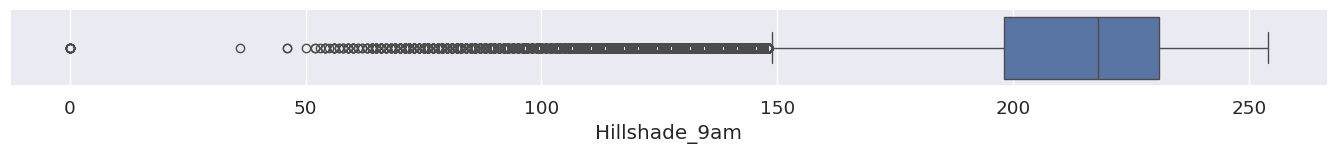

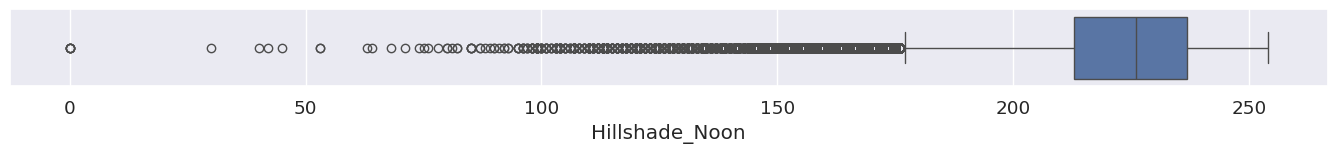

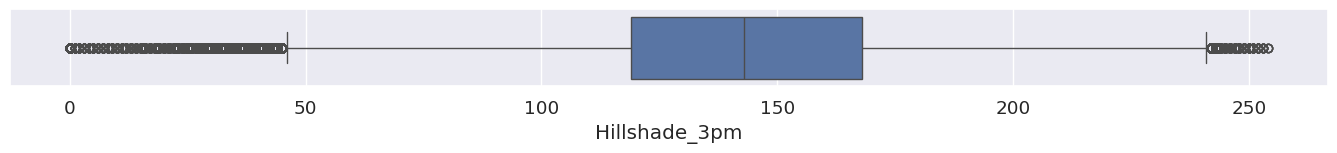

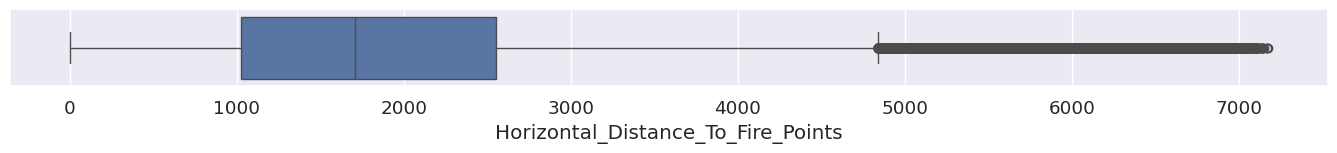

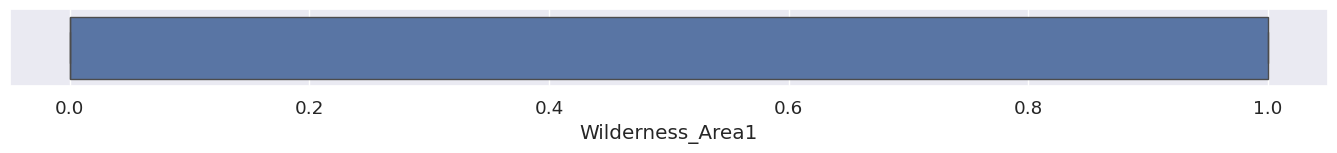

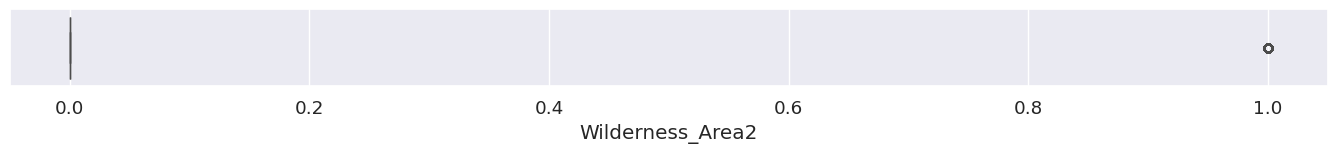

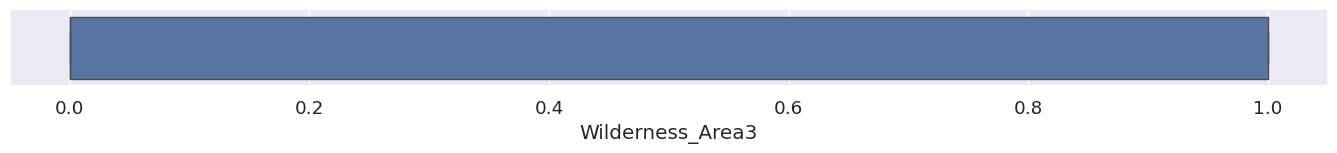

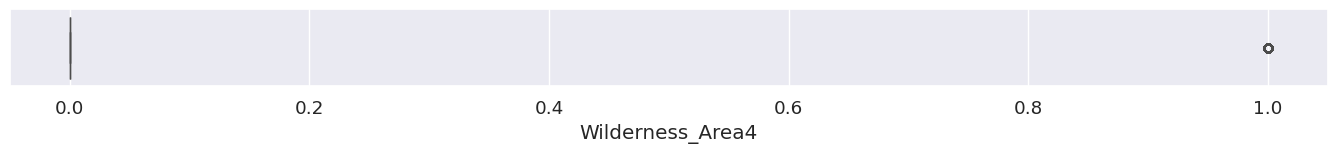

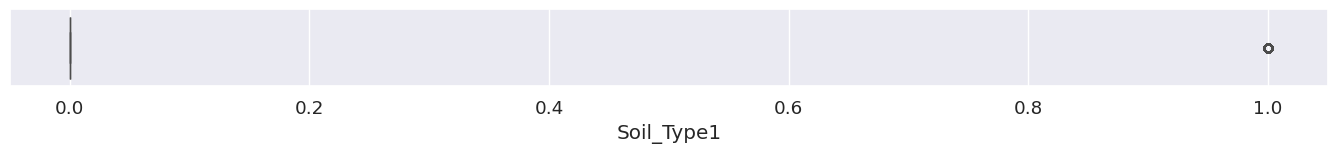

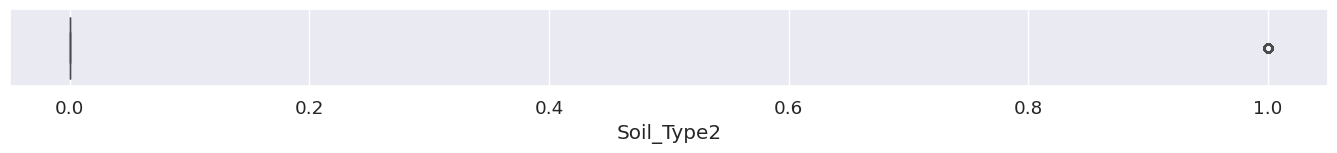

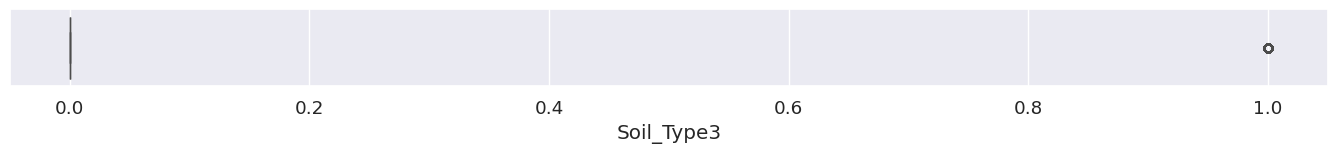

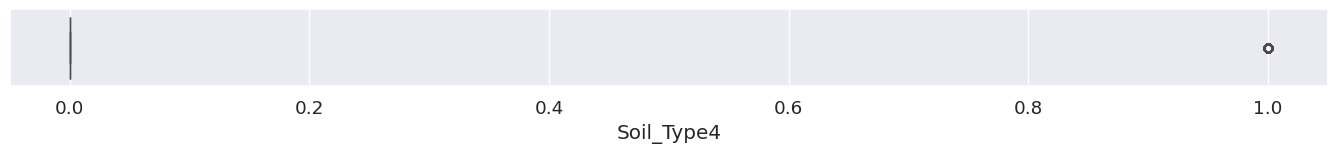

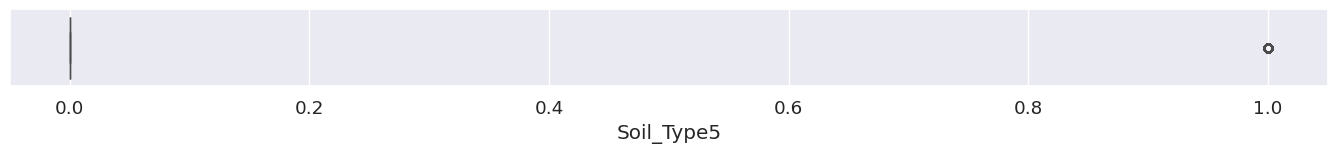

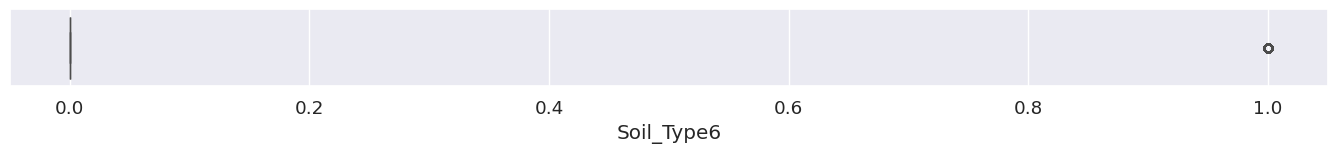

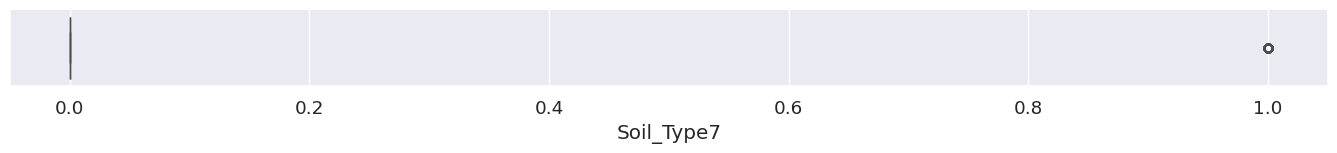

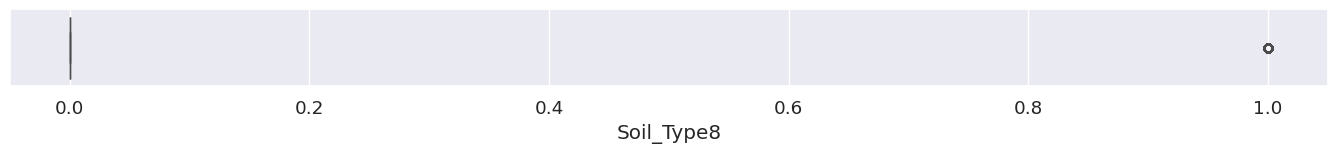

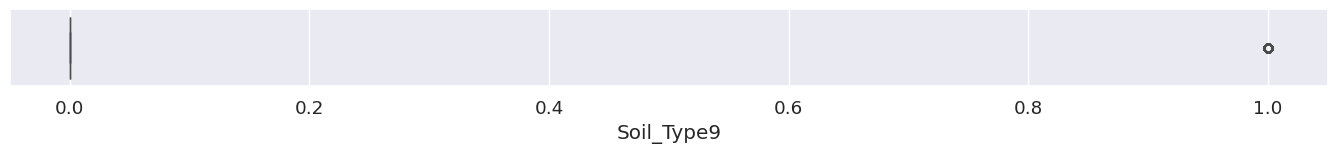

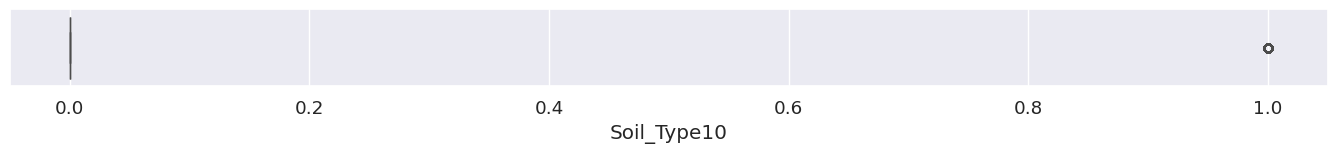

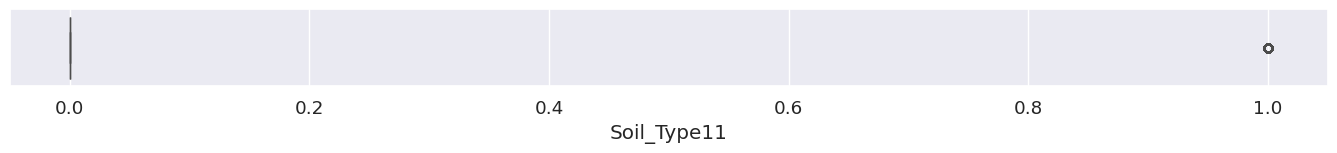

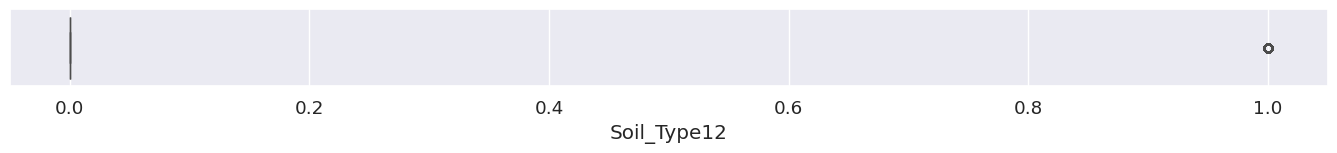

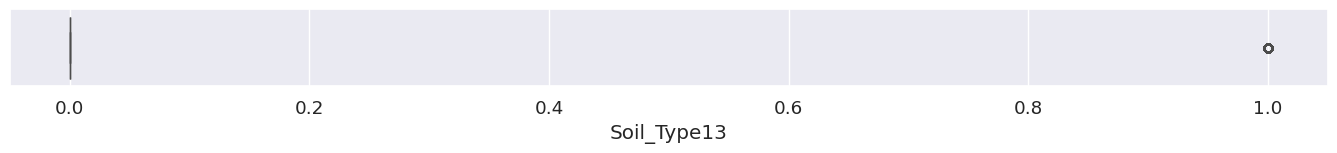

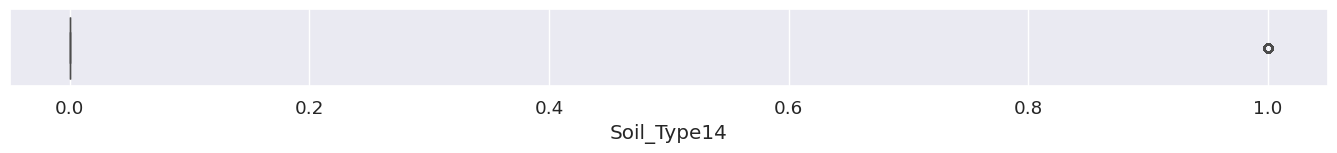

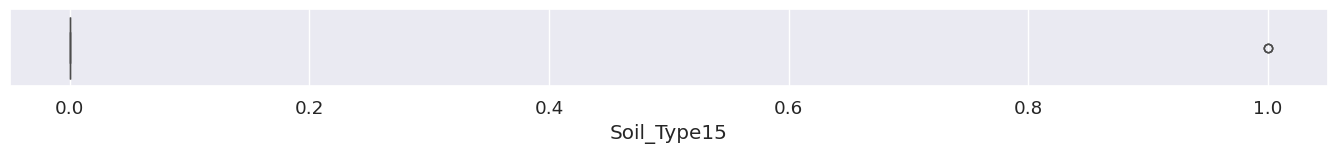

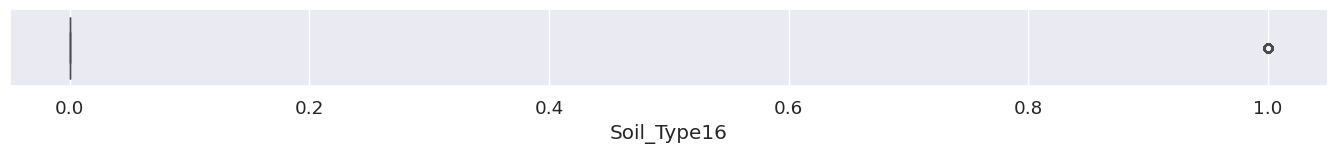

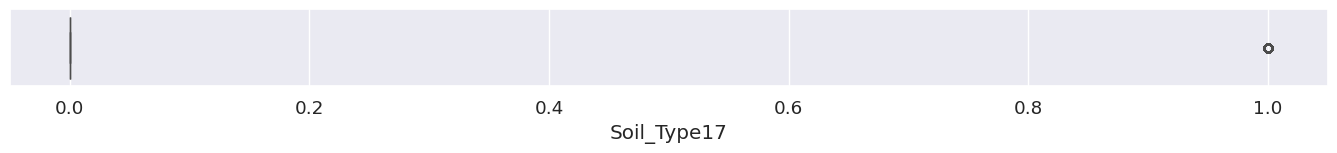

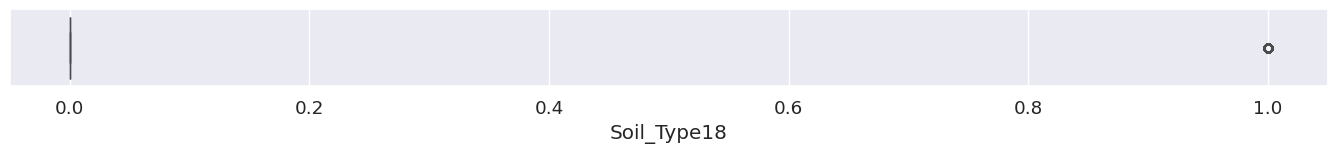

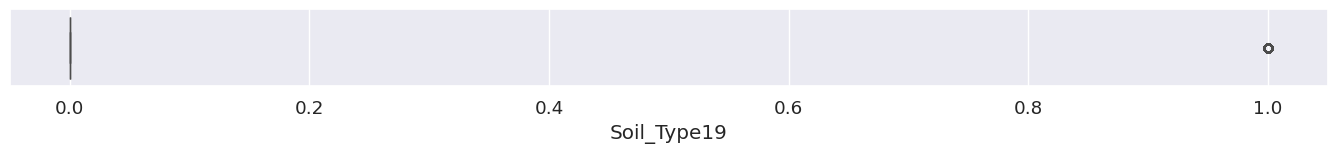

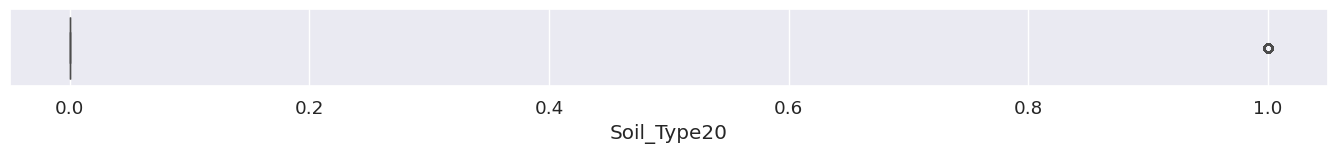

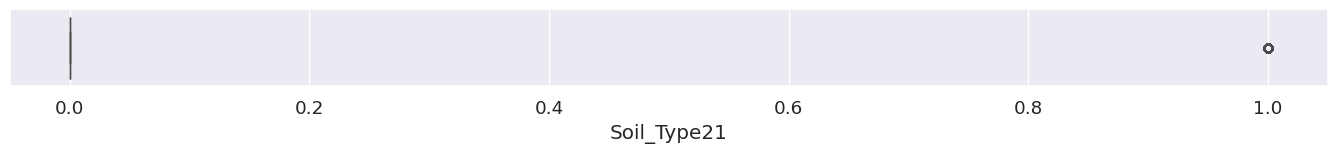

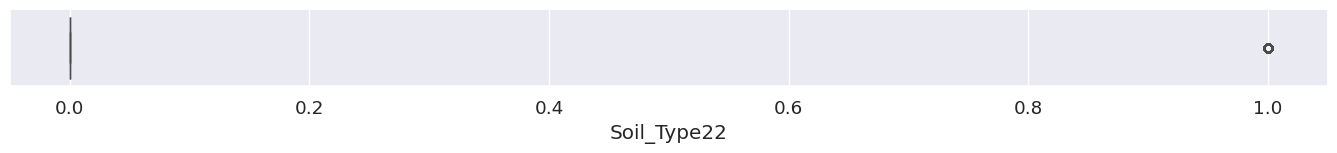

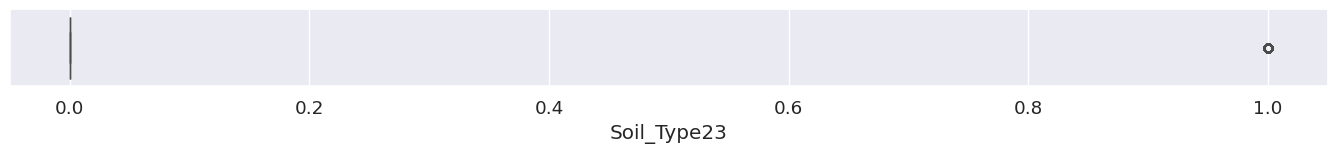

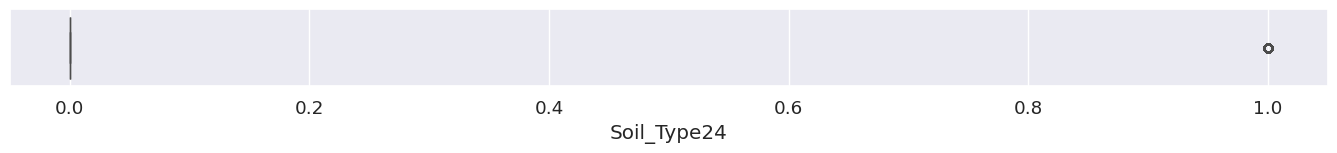

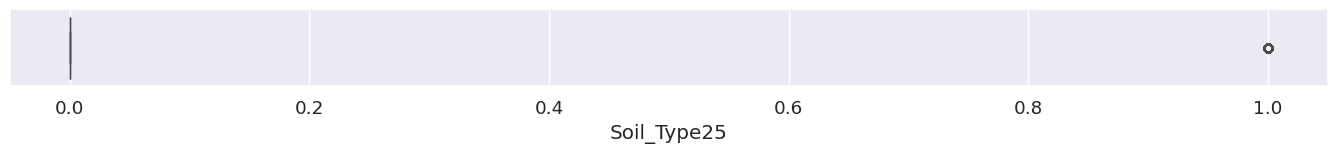

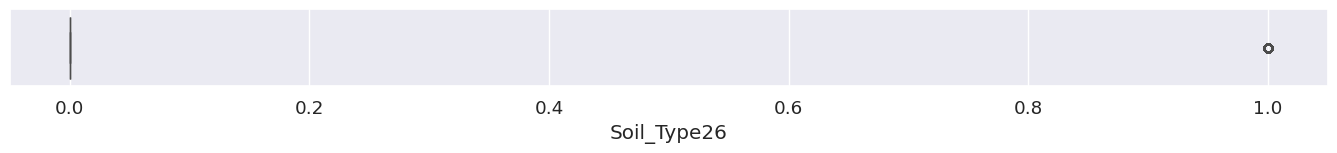

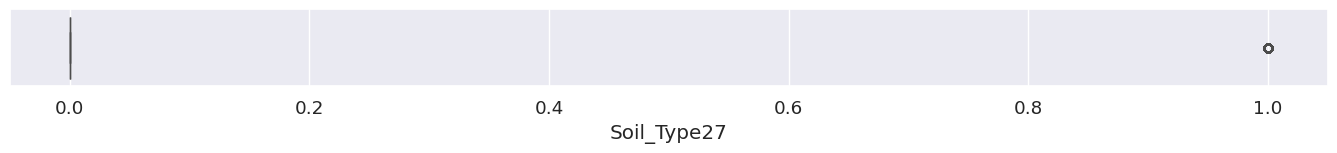

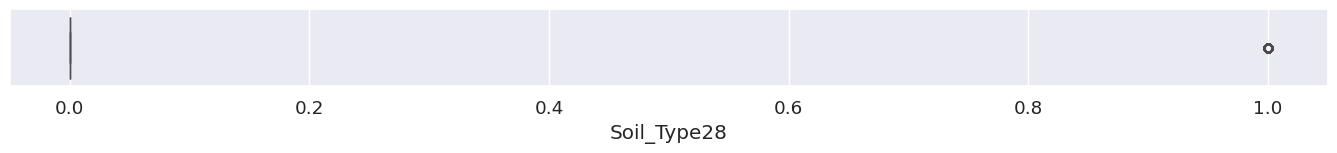

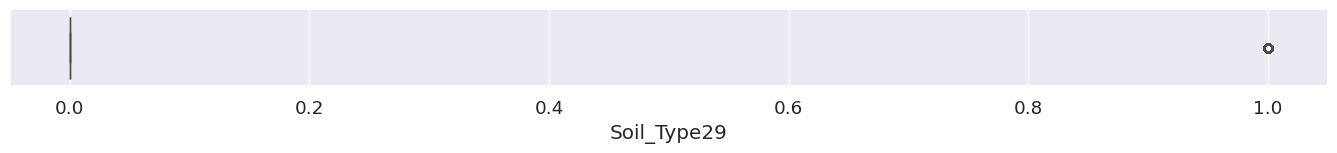

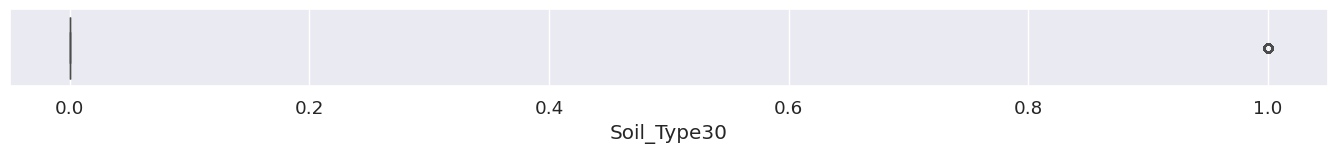

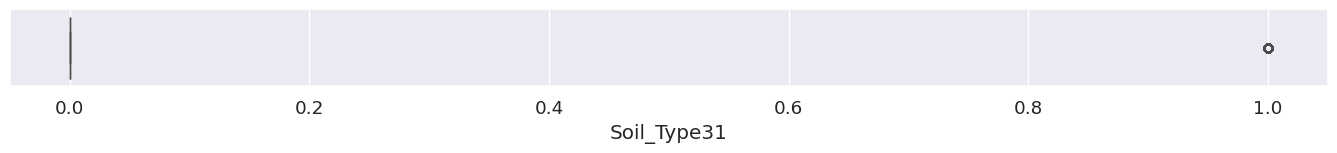

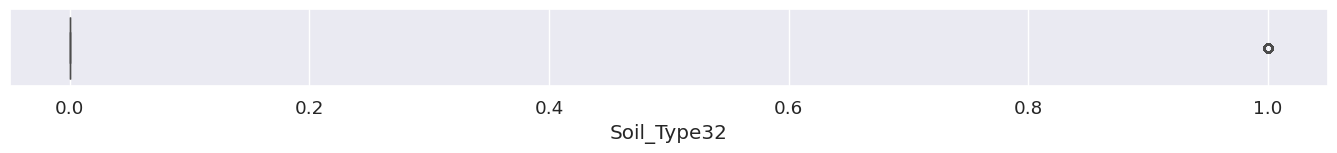

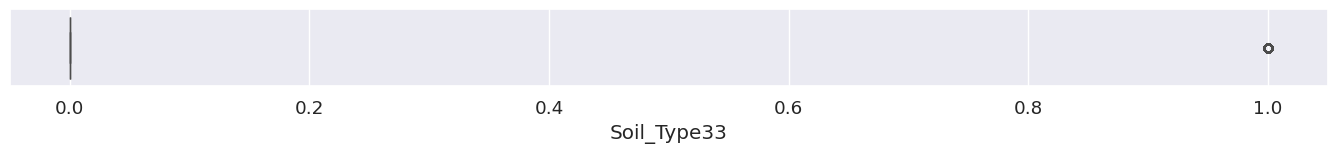

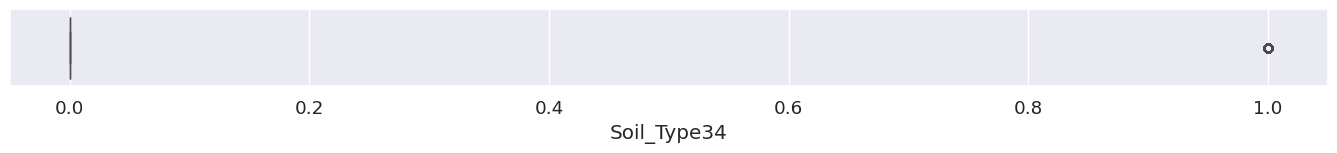

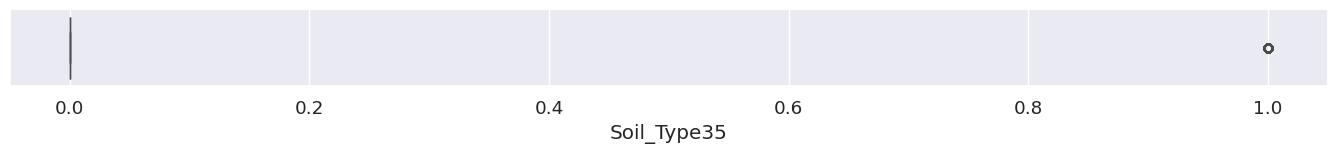

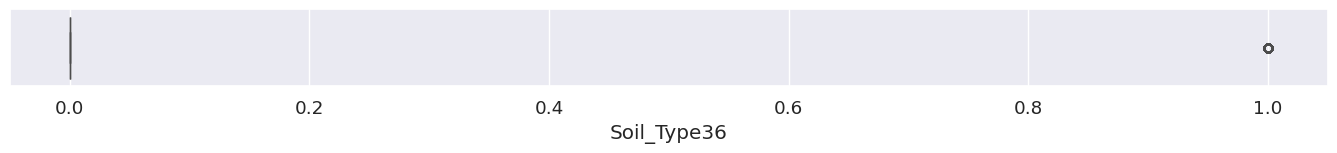

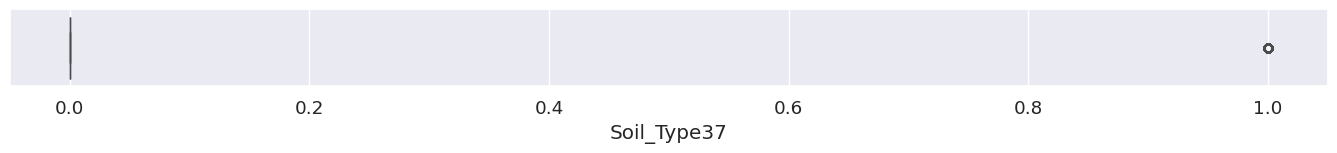

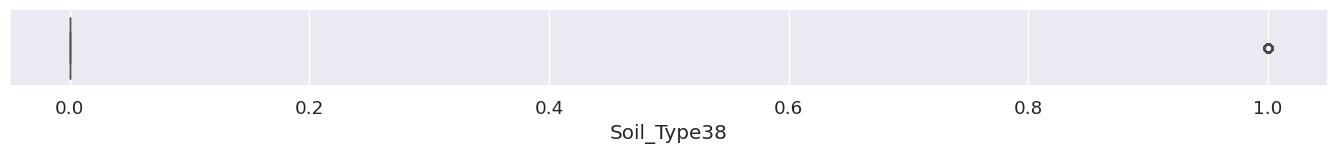

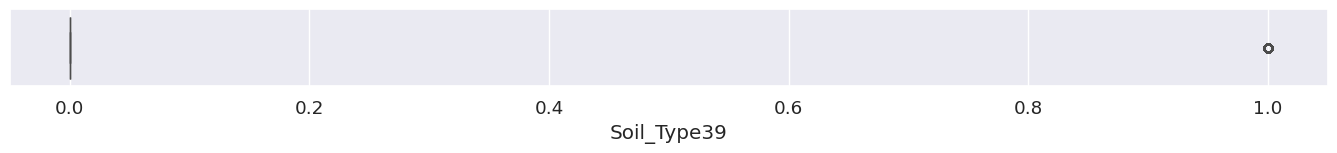

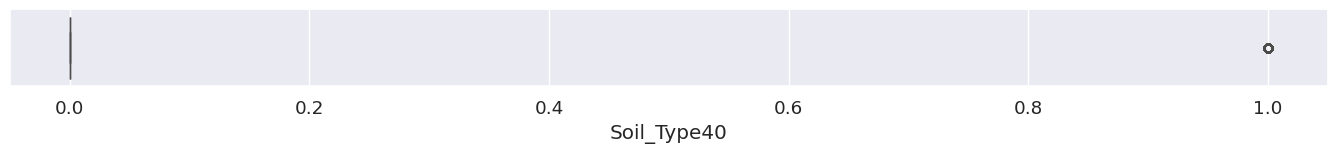

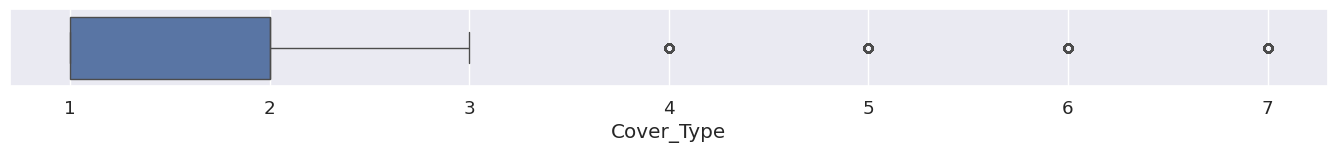

In [28]:
df1=data.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [29]:
def treat_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: np.clip(x, lower_bound, upper_bound))
num_columns = data.select_dtypes(include=[np.number]).columns
data[num_columns] = data[num_columns].apply(treat_outliers)
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,4839.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,4839.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,4839.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,4839.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,4839.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


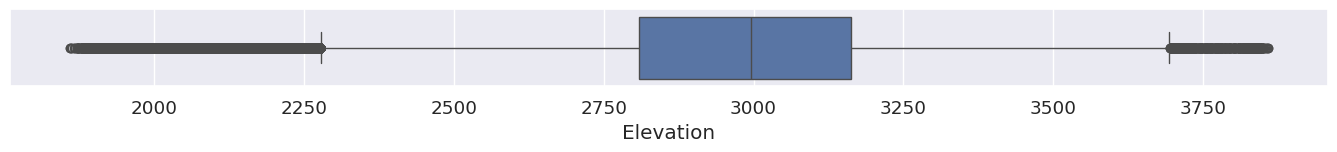

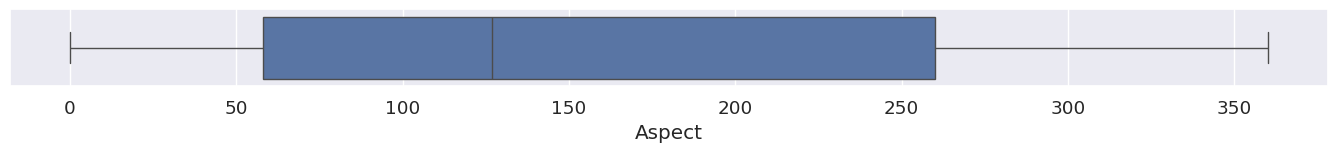

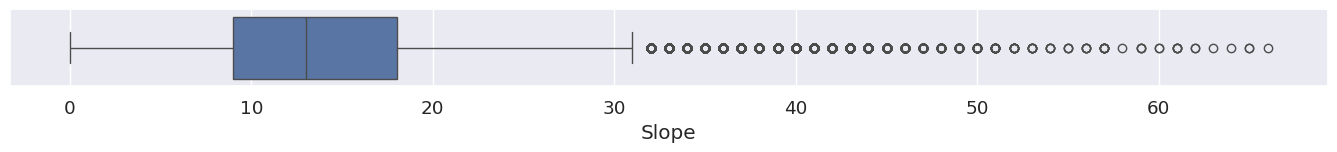

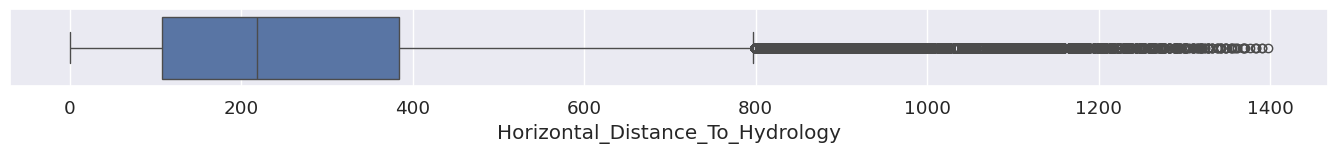

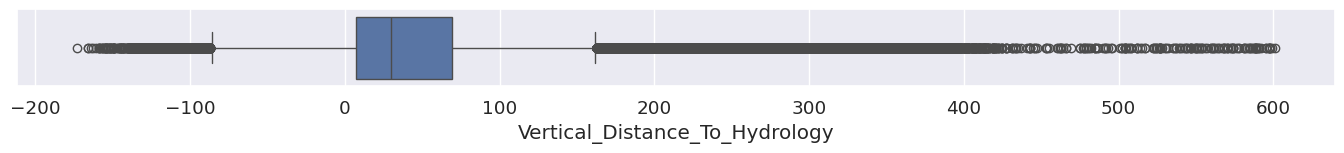

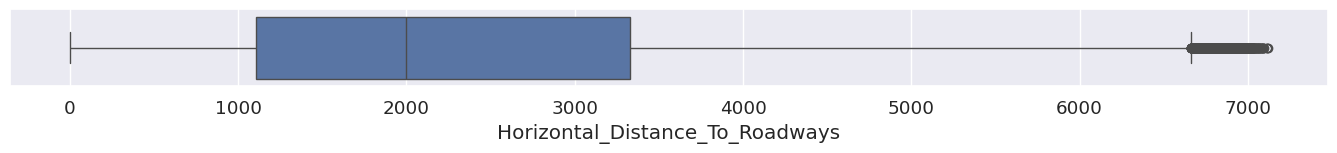

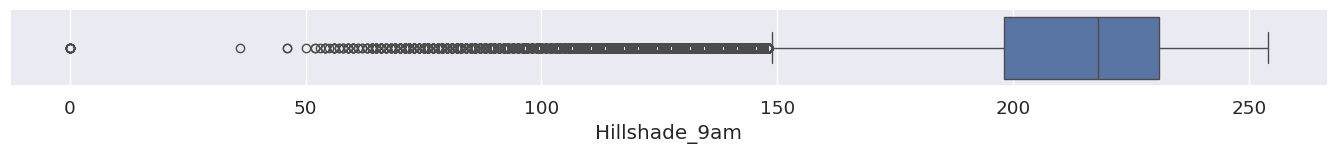

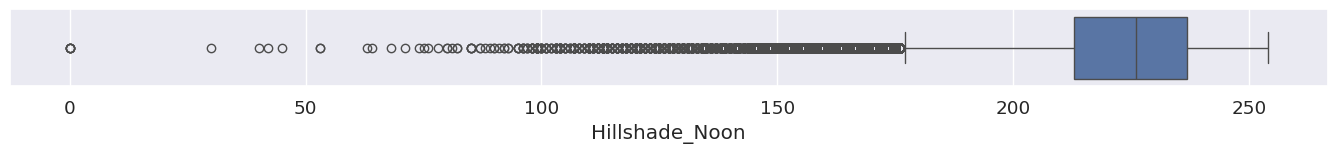

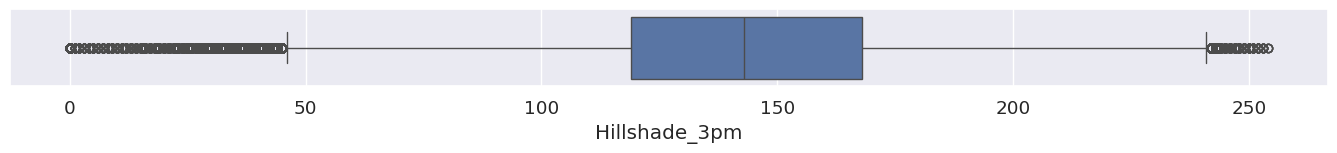

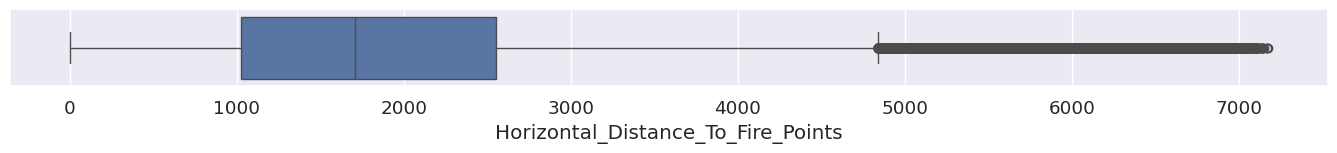

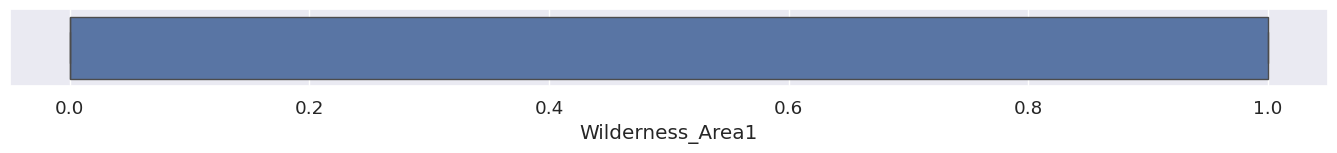

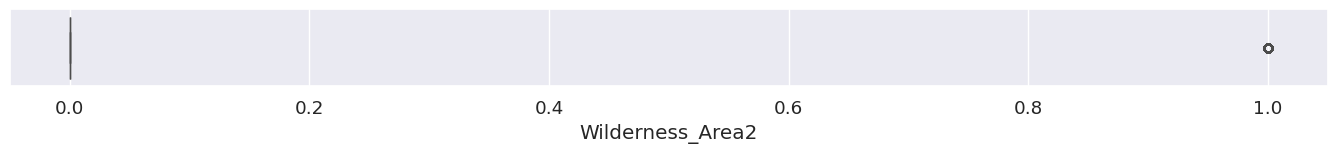

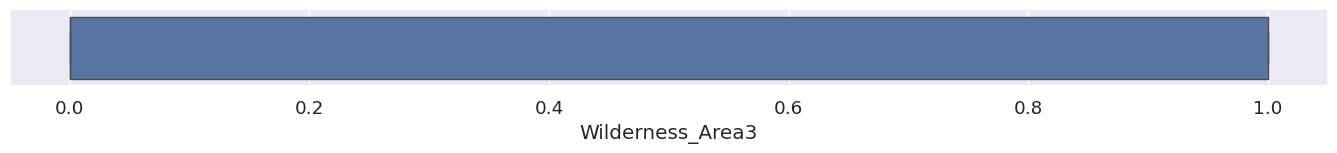

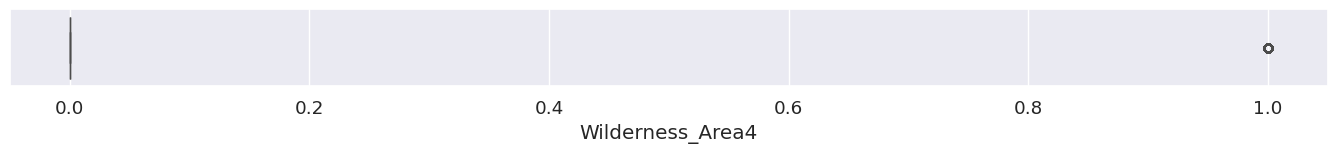

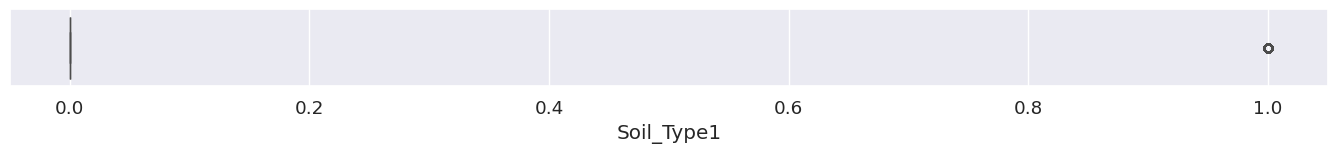

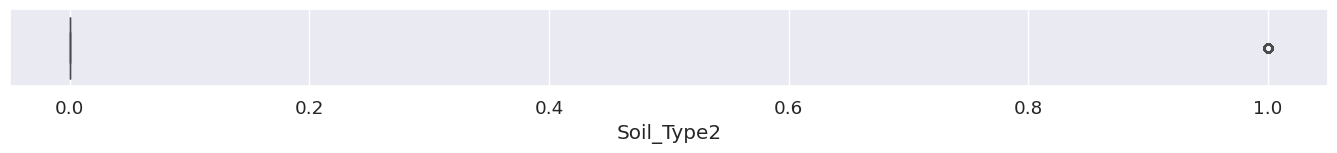

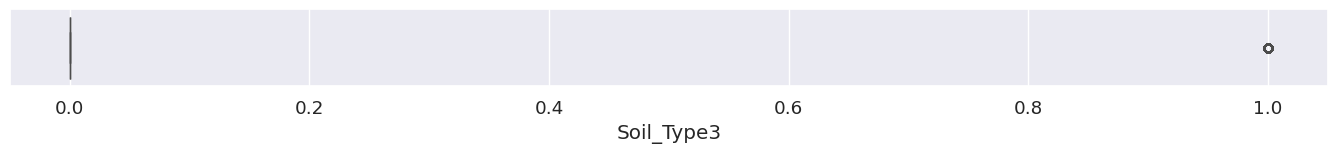

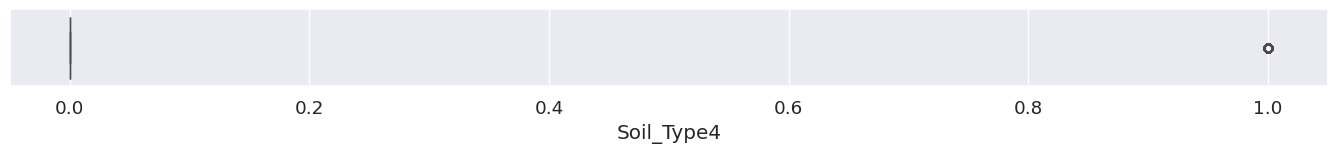

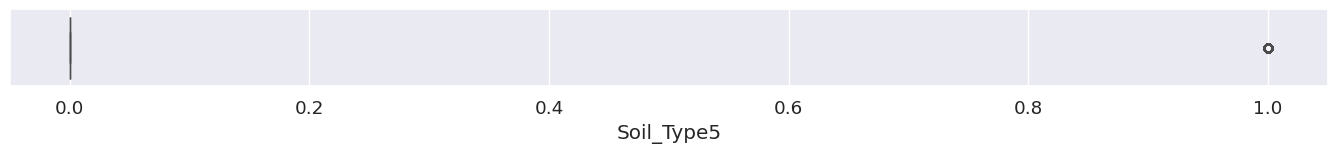

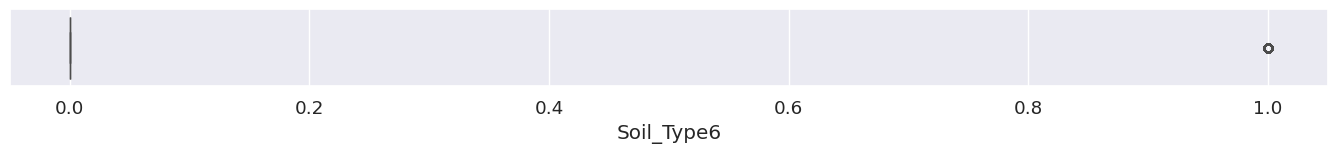

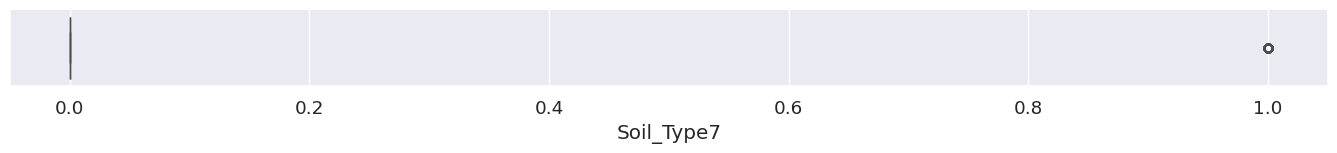

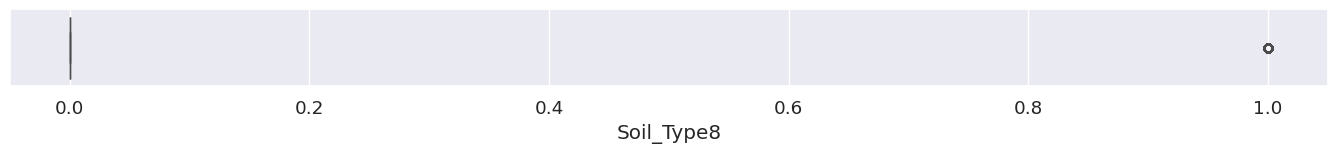

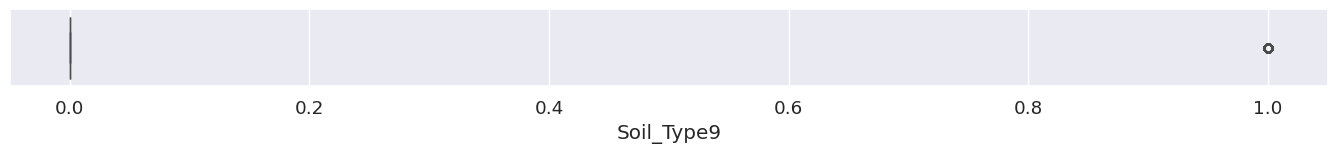

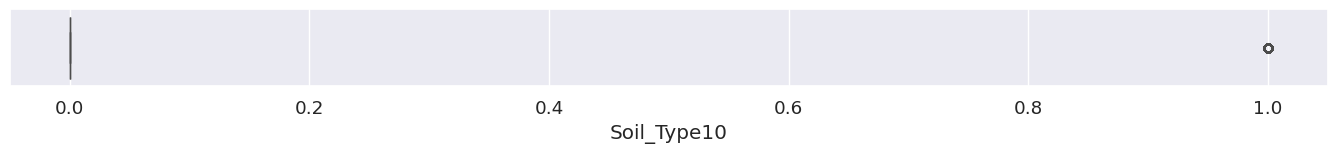

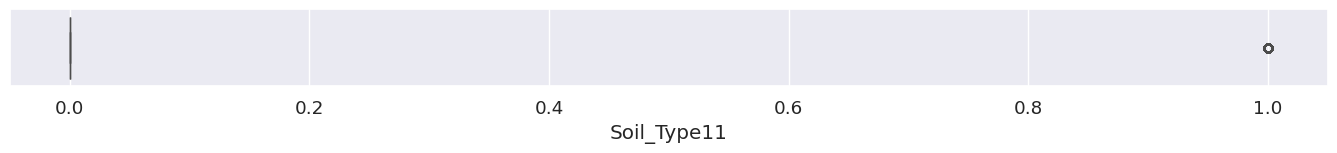

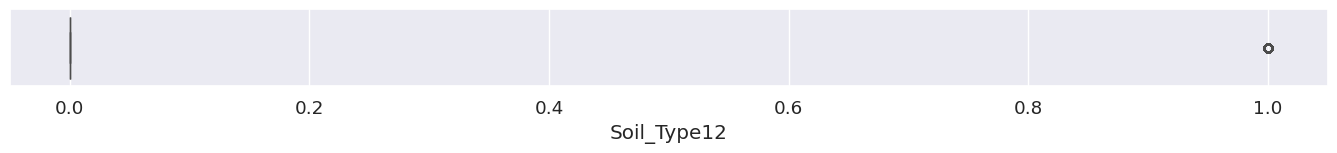

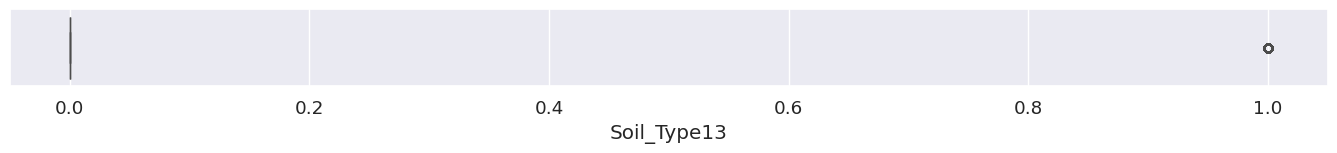

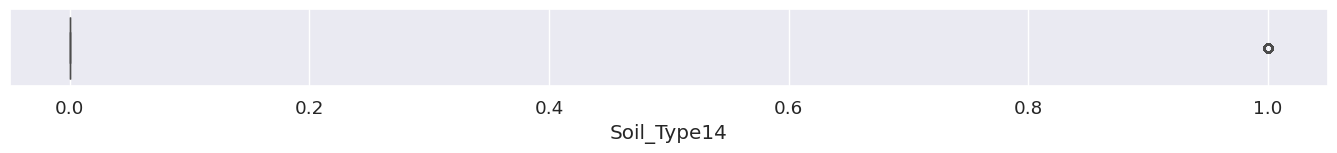

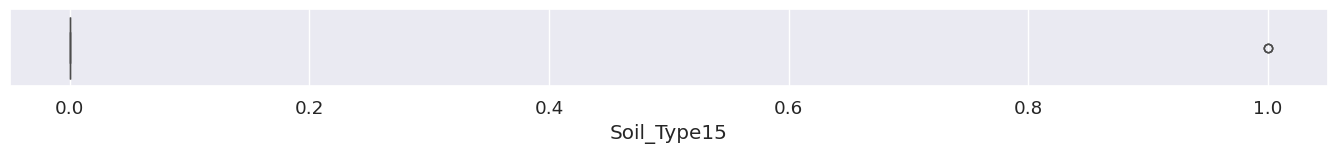

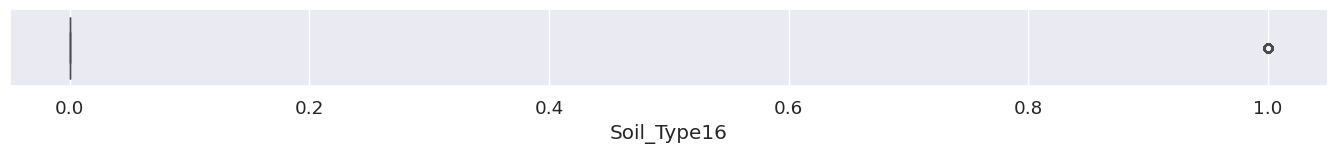

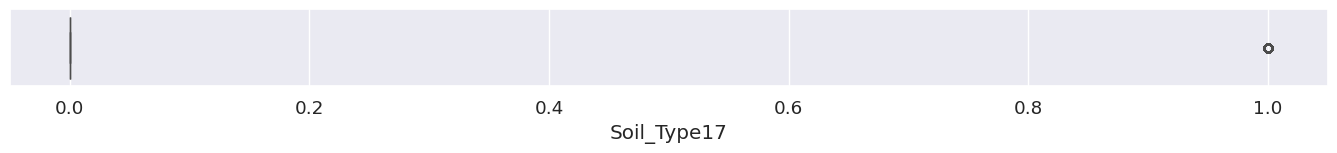

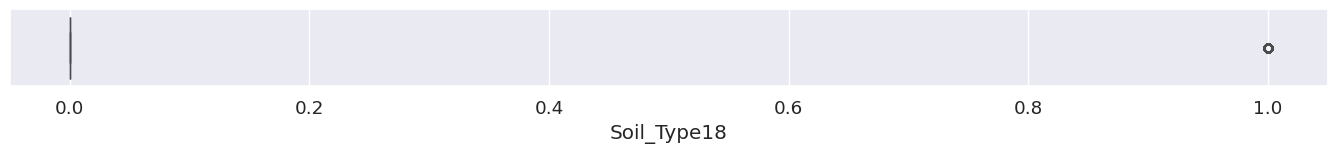

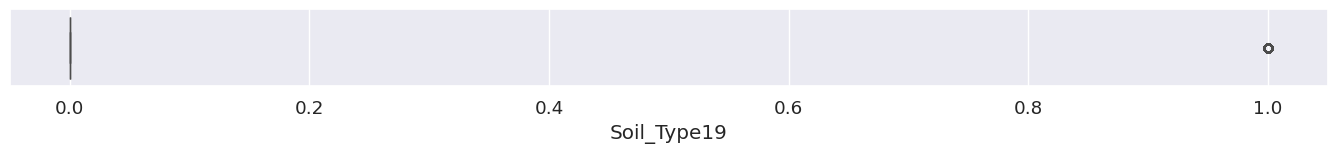

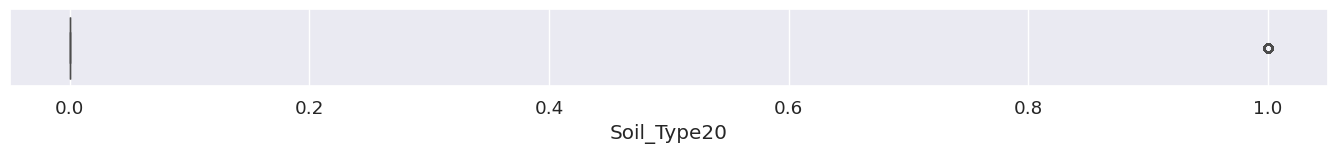

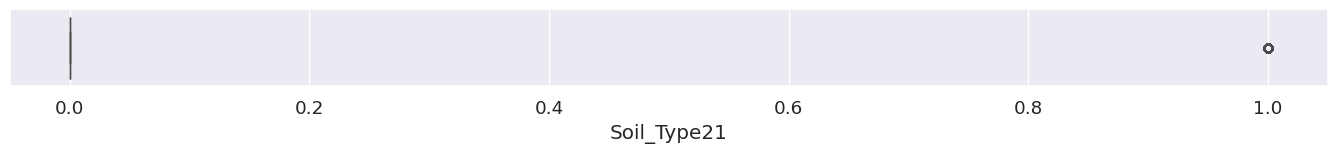

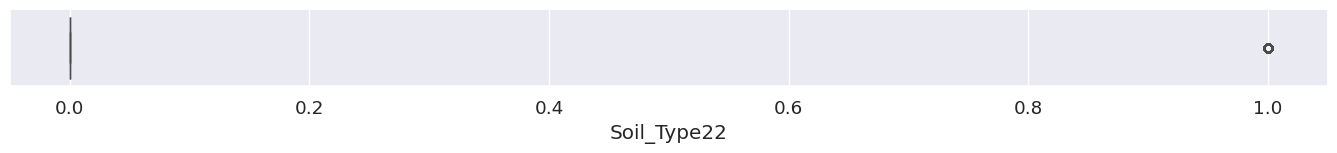

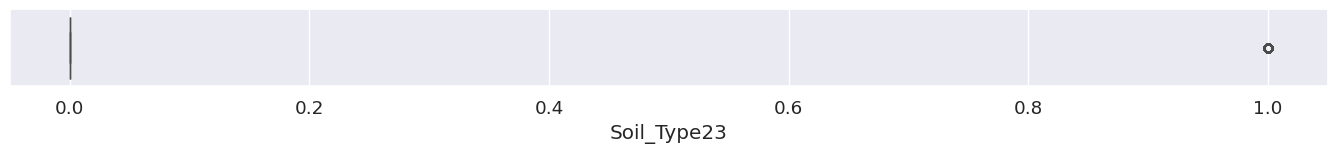

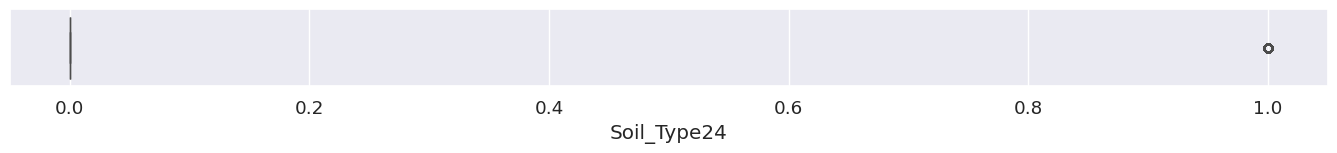

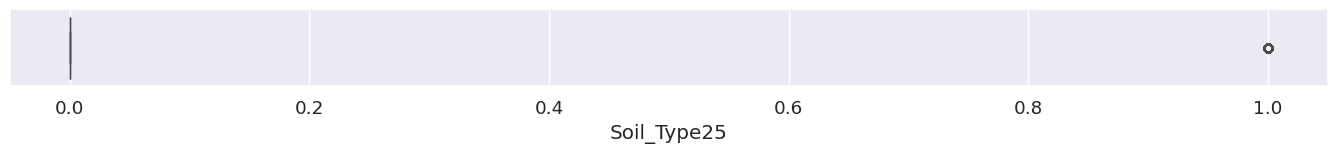

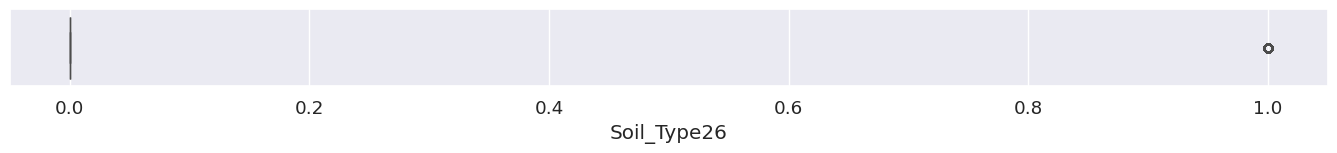

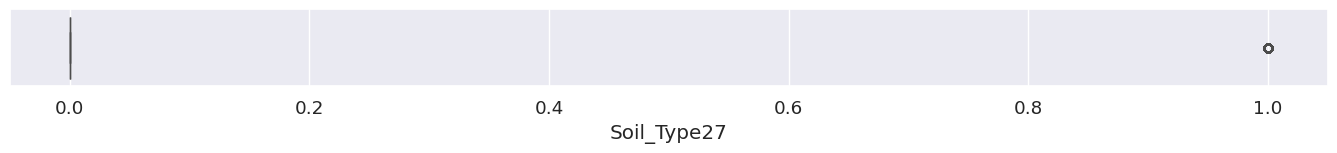

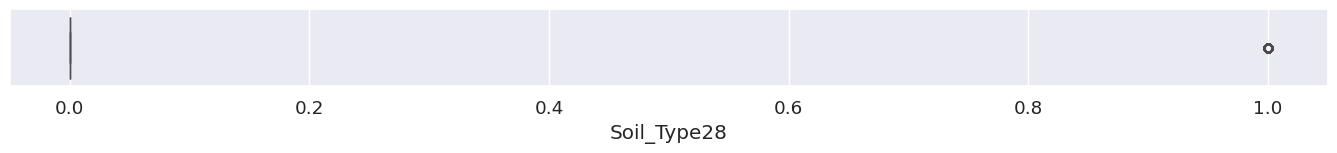

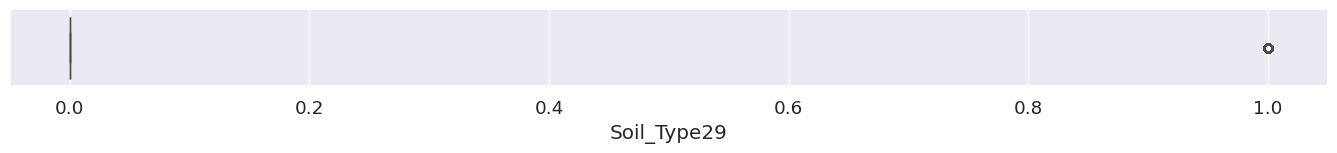

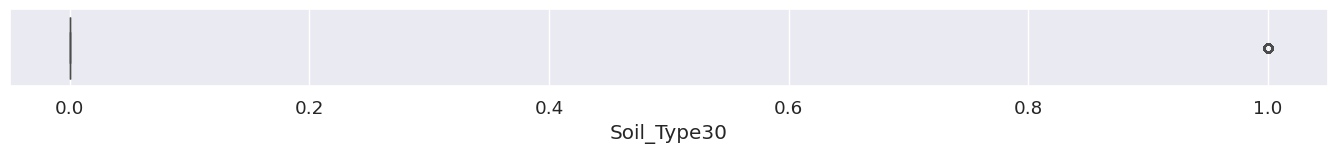

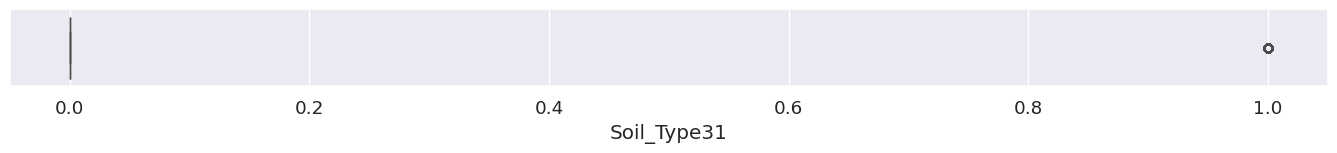

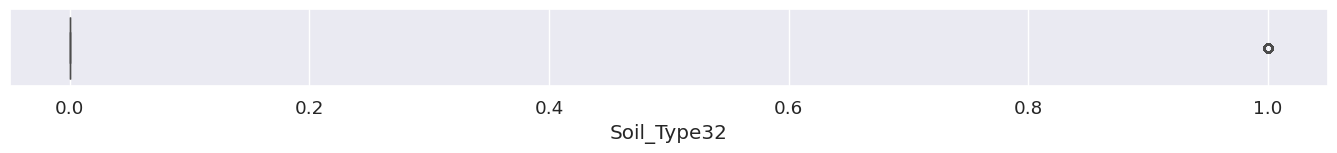

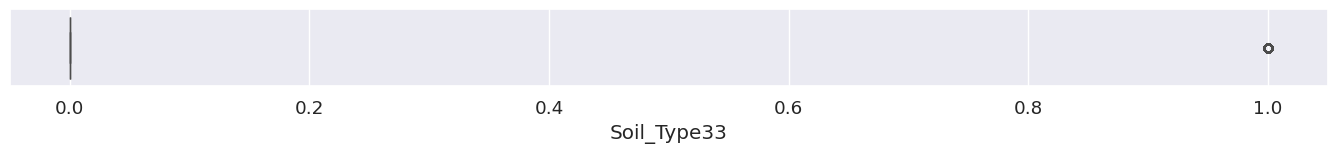

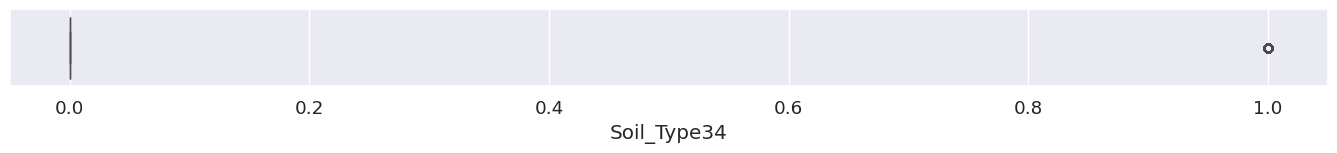

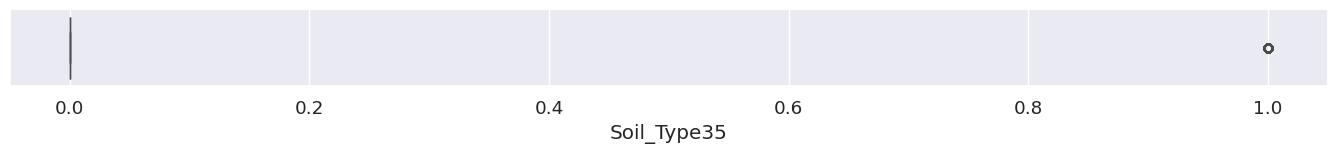

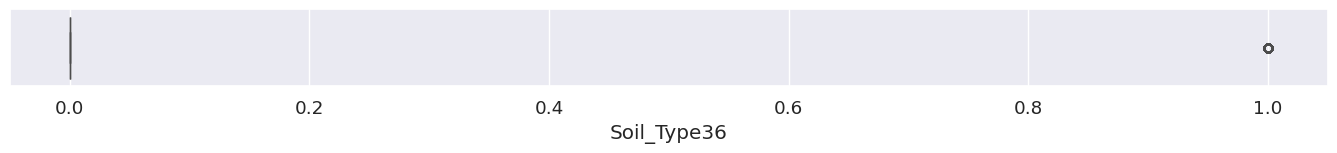

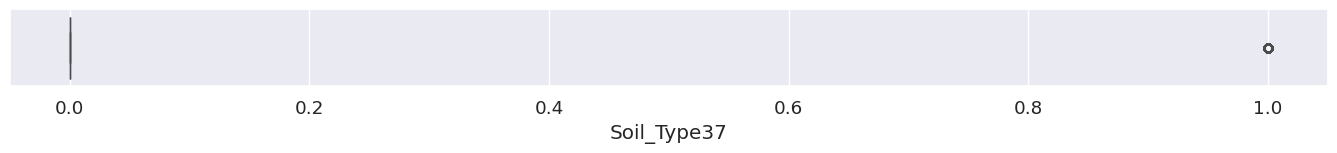

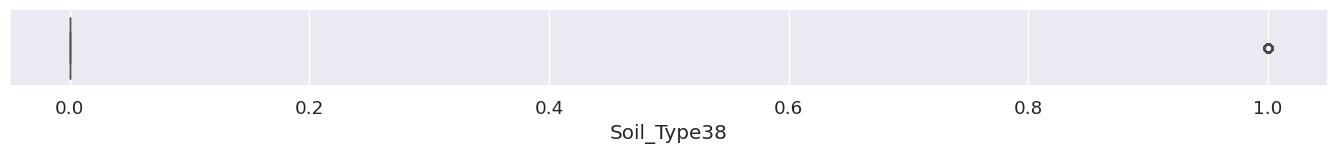

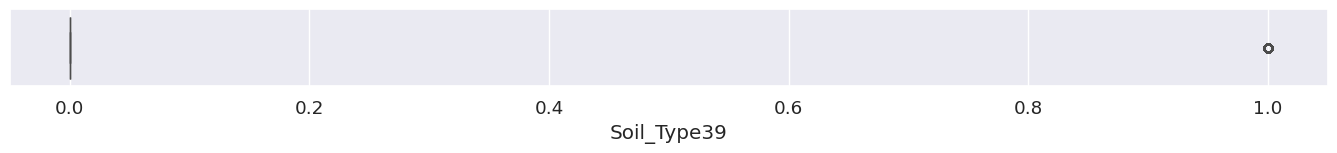

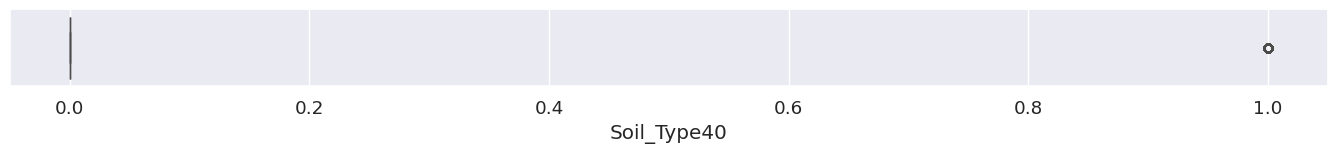

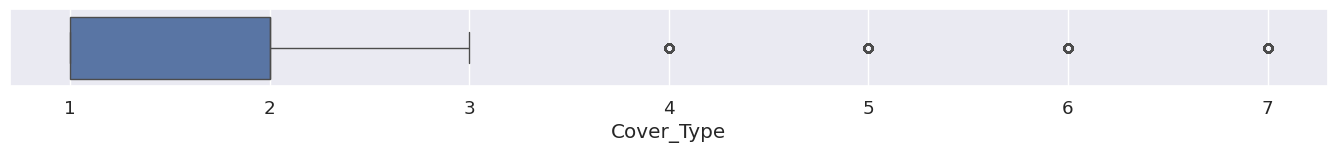

Data with actual values:
        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                     

In [46]:
df1 = data.select_dtypes(exclude=['object'])

# Plot boxplots for numerical columns
for column in df1:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data=df1, x=column)
    plt.show()

Accuracy --  94.81456493153325


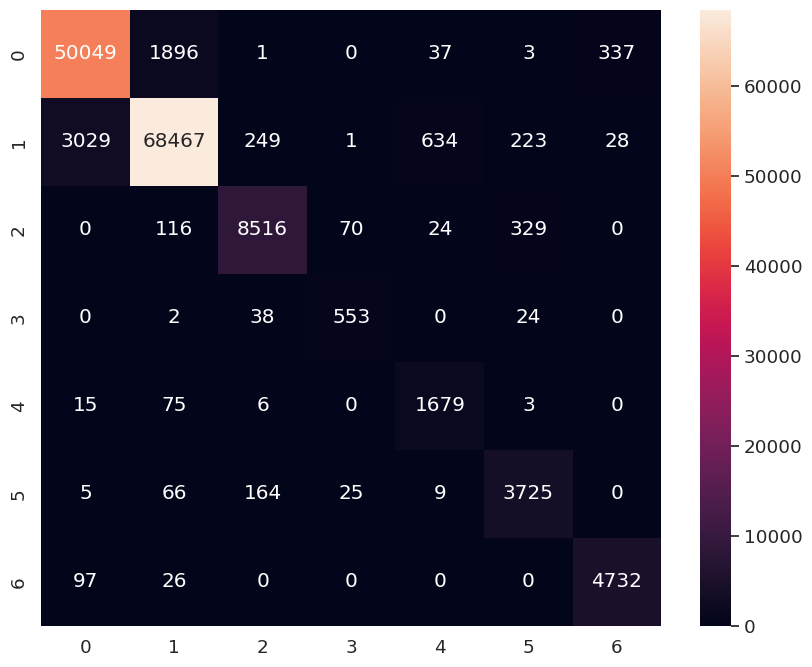

In [31]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared Error
r_squared = r2_score(y_test, y_pred)
print("R-squared Error:", r_squared)


Mean Squared Error: 0.2698050986898722
Mean Absolute Error: 0.09266590018794793
R-squared Error: 0.8611354773392724


Strategy 2: **Trimming**

In [33]:
import numpy as np

data = pd.read_csv('/content/covtype.csv')

# Define trimming thresholds (replace these with your desired thresholds)
lower_threshold = 1  # Lower threshold for trimming outliers
upper_threshold = 10  # Upper threshold for trimming outliers

# Trim outliers from the dataset
trimmed_data = data[(data >= lower_threshold) & (data <= upper_threshold)]

# Print the trimmed data
print("Trimmed Data:\n", trimmed_data)


Trimmed Data:
         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0             NaN     NaN    3.0                               NaN   
1             NaN     NaN    2.0                               NaN   
2             NaN     NaN    9.0                               NaN   
3             NaN     NaN    NaN                               NaN   
4             NaN     NaN    2.0                               NaN   
...           ...     ...    ...                               ...   
581007        NaN     NaN    NaN                               NaN   
581008        NaN     NaN    NaN                               NaN   
581009        NaN     NaN    NaN                               NaN   
581010        NaN     NaN    NaN                               NaN   
581011        NaN     NaN    NaN                               NaN   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  NaN                              N

Accuracy --  94.80630348426538


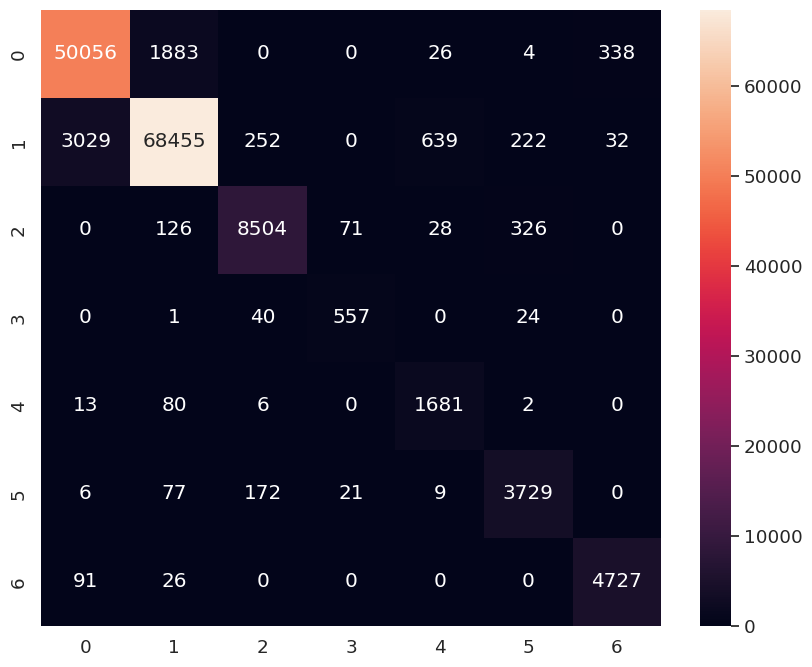

In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared Error
r_squared = r2_score(y_test, y_pred)
print("R-squared Error:", r_squared)


Mean Squared Error: 0.27012867204119706
Mean Absolute Error: 0.0928655518302548
R-squared Error: 0.8609689391263341


Strategy:3 **Min -Max Scaling**

In [36]:
import numpy as np

# Define your dataset (replace this with your actual dataset)
data = pd.read_csv('/content/covtype.csv')
# Define Min-max scaling function
def min_max_scaling(data):
    # Calculate the minimum and maximum values for each feature
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)

    # Perform min-max scaling for each feature
    scaled_data = (data - min_vals) / (max_vals - min_vals)

    return scaled_data

# Apply Min-max scaling to your dataset
scaled_data = min_max_scaling(data)

# Print the scaled dataset
print("Scaled Data:\n", scaled_data)


Scaled Data:
         Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0        0.368684  0.141667  0.045455                          0.184681   
1        0.365683  0.155556  0.030303                          0.151754   
2        0.472736  0.386111  0.136364                          0.191840   
3        0.463232  0.430556  0.272727                          0.173228   
4        0.368184  0.125000  0.030303                          0.109520   
...           ...       ...       ...                               ...   
581007   0.268634  0.425000  0.303030                          0.060845   
581008   0.266133  0.422222  0.287879                          0.047960   
581009   0.263632  0.441667  0.257576                          0.042949   
581010   0.262631  0.472222  0.227273                          0.042949   
581011   0.262131  0.458333  0.196970                          0.042949   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0         

Accuracy --  94.88272187149319


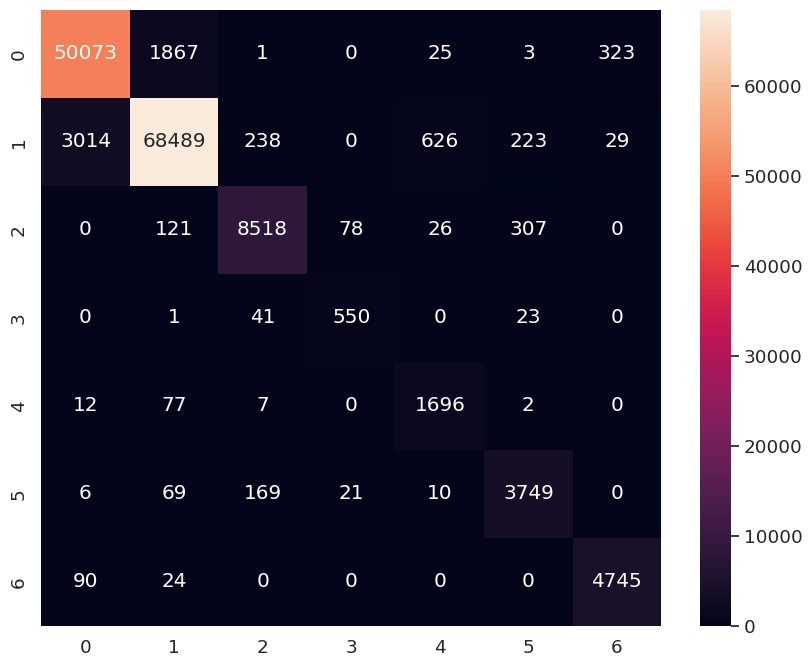

In [37]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared Error
r_squared = r2_score(y_test, y_pred)
print("R-squared Error:", r_squared)


Mean Squared Error: 0.2614748060281027
Mean Absolute Error: 0.09066938376487921
R-squared Error: 0.8654229504808769


Strategy:3 **Standardization**

In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define your dataset (replace this with your actual dataset)
data = pd.read_csv('/content/covtype.csv')

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data)

# Print the scaled data
print("Scaled Data:\n", scaled_data)


Scaled Data:
 [[-1.29780509 -0.93515698 -1.48281978 ... -0.15601398 -0.12365355
   2.11136619]
 [-1.31923485 -0.89047967 -1.61636259 ... -0.15601398 -0.12365355
   2.11136619]
 [-0.5549068  -0.14883628 -0.68156292 ... -0.15601398 -0.12365355
  -0.03685673]
 ...
 [-2.04784663  0.02987297  0.38677957 ... -0.15601398 -0.12365355
   0.67921758]
 [-2.05498988  0.12816306  0.11969395 ... -0.15601398 -0.12365355
   0.67921758]
 [-2.05856151  0.08348575 -0.14739167 ... -0.15601398 -0.12365355
   0.67921758]]


Accuracy --  94.77876532670581


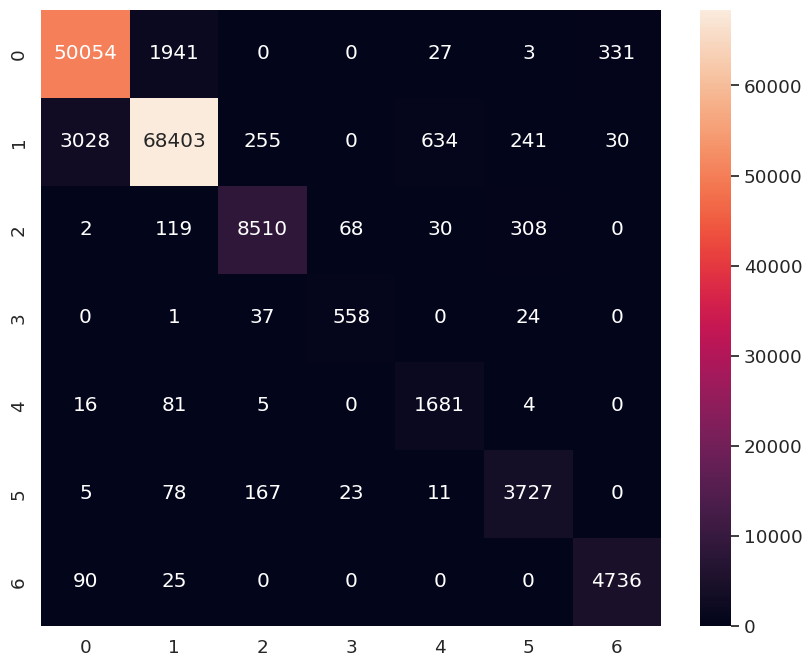

In [40]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# R-squared Error
r_squared = r2_score(y_test, y_pred)
print("R-squared Error:", r_squared)


Mean Squared Error: 0.26874487962382876
Mean Absolute Error: 0.09288620544842448
R-squared Error: 0.8616811557391131
